# Data Royale 2024 - Tim Sampurmild - Atrittion Data

In [16]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_columns', 0)

In [17]:
data = pd.read_csv('/kaggle/input/data-royale-2024/Train.csv')
data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7000,44.0,NaN,NaN,Human Resources,NaN,NaN,Marketing,NaN,NaN,Female,NaN,NaN,NaN,Manager,NaN,Single,NaN,NaN,NaN,Y,Yes,NaN,NaN,NaN,NaN,NaN,17,3,NaN,7,5,5,2,0
1,7001,28.0,Travel_Rarely,949.0,Human Resources,7.0,4.0,Technical Degree,1.0,3.0,Male,83.0,3.0,1.0,Sales Executive,4.0,Divorced,4608.0,8499.0,0.0,Y,Yes,12.0,3.0,3.0,80.0,1.0,6,3,3.0,5,2,0,3,1
2,7002,26.0,Travel_Rarely,566.0,Human Resources,10.0,3.0,Medical,1.0,3.0,Male,46.0,3.0,2.0,Research Scientist,4.0,Single,4770.0,9142.0,1.0,Y,No,13.0,3.0,1.0,80.0,0.0,5,4,3.0,5,3,1,2,0
3,7003,34.0,Travel_Frequently,512.0,Sales,3.0,3.0,Medical,1.0,1.0,Male,47.0,2.0,3.0,Sales Executive,4.0,Married,8194.0,11053.0,3.0,Y,No,13.0,3.0,1.0,80.0,1.0,14,2,3.0,12,8,1,11,0
4,7004,34.0,Travel_Rarely,475.0,Research & Development,12.0,1.0,Medical,1.0,2.0,Female,51.0,3.0,1.0,Research Scientist,4.0,Single,3691.0,18185.0,3.0,Y,No,17.0,3.0,1.0,80.0,0.0,5,4,3.0,3,2,0,2,0


# Exploratory Data Analysis

## **Look at the Data**

In [18]:
data.describe() #given an overview of the data

,id,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EnvironmentSatisfaction,HourlyRate,JobInvolvement,JobLevel,JobSatisfaction,MonthlyIncome,MonthlyRate,NumCompaniesWorked,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
count,6530.000000,6530.000000,5216.000000,5207.000000,5212.000000,5221.0,5230.000000,5201.000000,5225.000000,5240.000000,5186.000000,5208.000000,5194.000000,5221.000000,5216.000000,5192.000000,5182.000000,5239.0,5236.000000,6530.000000,6530.000000,5197.000000,6530.000000,6530.000000,6530.000000,6530.000000,6530.000000
mean,10264.500000,42.529301,793.837423,9.655848,2.864351,1.0,2.646845,65.654297,2.637321,1.864313,2.641342,5932.928571,14246.472468,2.621912,15.190567,3.129430,2.633153,80.0,0.737013,11.602757,2.724655,2.682894,8.338132,4.566156,2.821746,4.374732,0.396325
std,1885.192961,17.545233,358.183860,7.392166,0.954451,0.0,1.036965,17.839716,0.717016,0.984566,1.026636,4268.941464,6359.405942,2.315517,3.508778,0.335707,1.014242,0.0,0.795506,8.599169,1.233432,0.727949,8.252890,3.925480,3.658925,3.812741,0.489171
min,7000.000000,18.000000,107.000000,1.000000,1.000000,1.0,1.000000,30.000000,1.000000,1.000000,1.000000,1081.000000,2166.000000,0.000000,11.000000,3.000000,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,8632.250000,31.000000,505.000000,4.000000,2.000000,1.0,2.000000,51.000000,2.000000,1.000000,2.000000,2805.750000,8861.250000,1.000000,13.000000,3.000000,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000,0.000000
50%,10264.500000,36.000000,792.000000,8.000000,3.000000,1.0,3.000000,65.000000,3.000000,2.000000,3.000000,4541.000000,14200.000000,2.000000,14.000000,3.000000,3.000000,80.0,1.000000,9.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000,0.000000
75%,11896.750000,47.000000,1093.000000,14.000000,4.000000,1.0,3.000000,81.000000,3.000000,2.000000,3.000000,7310.750000,19635.000000,4.000000,17.000000,3.000000,3.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,4.000000,7.000000,1.000000
max,13529.000000,86.717501,1495.000000,29.000000,5.000000,1.0,4.000000,100.000000,4.000000,5.000000,4.000000,19992.000000,26921.000000,9.000000,25.000000,4.000000,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,40.000000,18.000000,15.000000,16.000000,1.000000


## **Check for Duplicates**

In [19]:
data.duplicated().sum()

0

There are no duplicates

In [20]:
data.columns

Index(['id', 'Age', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField', 'EmployeeCount',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'Over18',
       'OverTime', 'PercentSalaryHike', 'PerformanceRating',
       'RelationshipSatisfaction', 'StandardHours', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager', 'Attrition'],
      dtype='object')

## **Change features to binary**

In [21]:
print(data['Attrition'].unique())
print(data['Over18'].unique())
print(data['OverTime'].unique())

[0 1]
['Y']
['Yes' 'No']


In [22]:
data['Attrition'] = data['Attrition'].apply(lambda x:1 if x == True else 0)
data['Over18'] = data['Over18'].apply(lambda x:1)
data['OverTime'] = data['OverTime'].apply(lambda x:1 if x == 'Yes' else 0)

In [23]:
data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobLevel,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager,Attrition
0,7000,44.0,NaN,NaN,Human Resources,NaN,NaN,Marketing,NaN,NaN,Female,NaN,NaN,NaN,Manager,NaN,Single,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,17,3,NaN,7,5,5,2,0
1,7001,28.0,Travel_Rarely,949.0,Human Resources,7.0,4.0,Technical Degree,1.0,3.0,Male,83.0,3.0,1.0,Sales Executive,4.0,Divorced,4608.0,8499.0,0.0,1,1,12.0,3.0,3.0,80.0,1.0,6,3,3.0,5,2,0,3,1
2,7002,26.0,Travel_Rarely,566.0,Human Resources,10.0,3.0,Medical,1.0,3.0,Male,46.0,3.0,2.0,Research Scientist,4.0,Single,4770.0,9142.0,1.0,1,0,13.0,3.0,1.0,80.0,0.0,5,4,3.0,5,3,1,2,0
3,7003,34.0,Travel_Frequently,512.0,Sales,3.0,3.0,Medical,1.0,1.0,Male,47.0,2.0,3.0,Sales Executive,4.0,Married,8194.0,11053.0,3.0,1,0,13.0,3.0,1.0,80.0,1.0,14,2,3.0,12,8,1,11,0
4,7004,34.0,Travel_Rarely,475.0,Research & Development,12.0,1.0,Medical,1.0,2.0,Female,51.0,3.0,1.0,Research Scientist,4.0,Single,3691.0,18185.0,3.0,1,0,17.0,3.0,1.0,80.0,0.0,5,4,3.0,3,2,0,2,0


## **Boxplot for checking outliers**

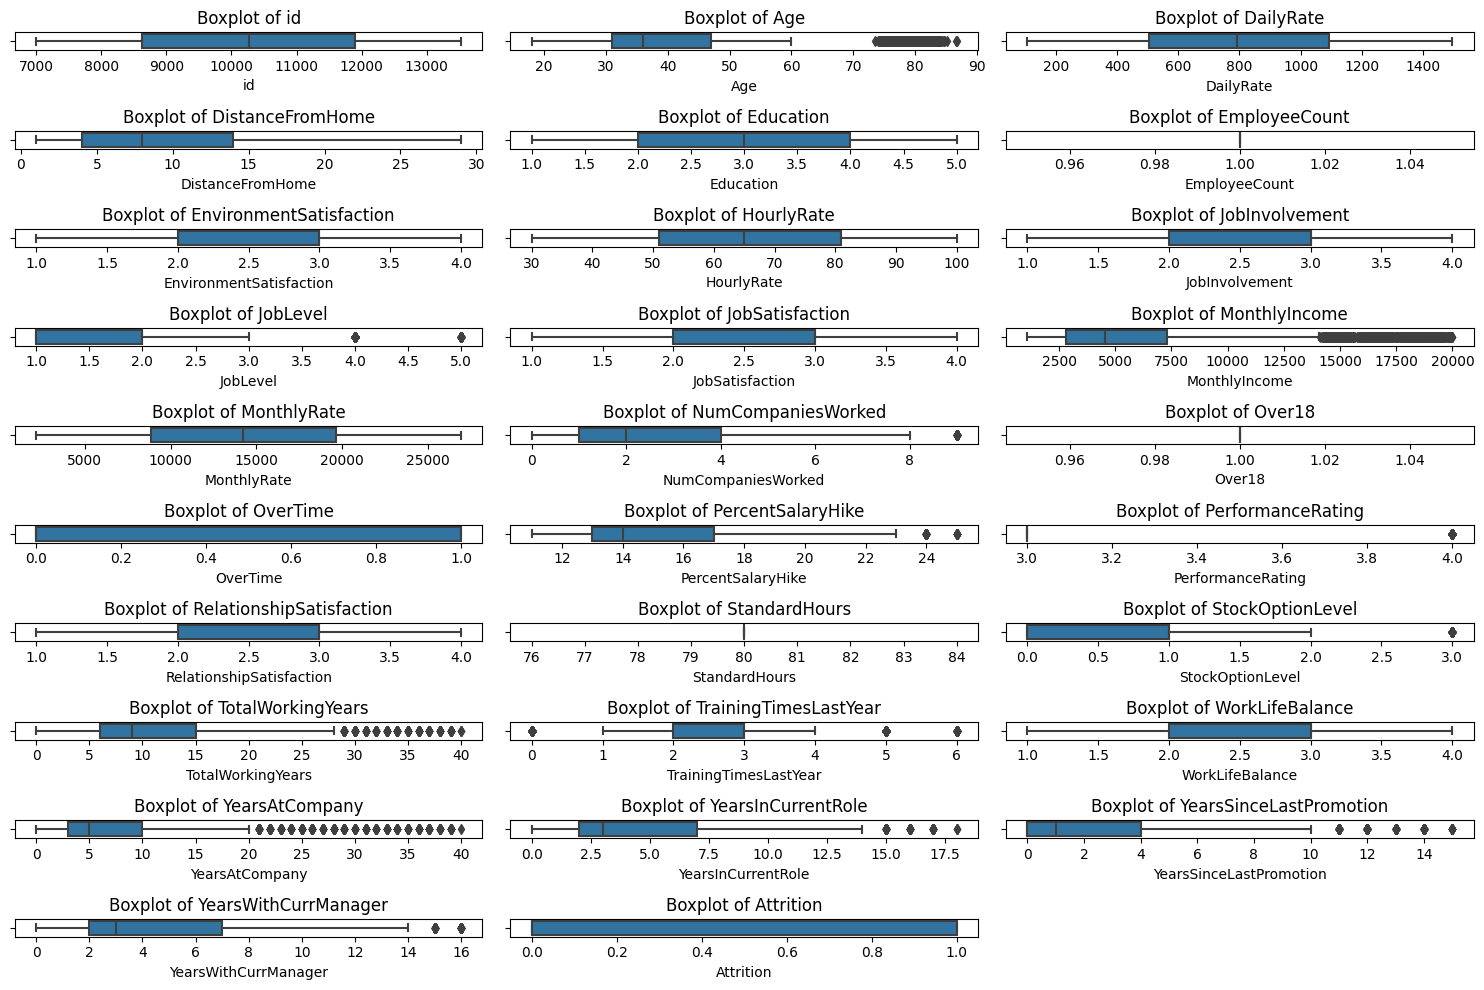

In [24]:

# Exclude non-numeric columns (if necessary)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the grid dimensions (e.g., 3 rows, 3 columns)
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the subplots with shared y-axis
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharey=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the numeric columns and create a boxplot for each
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


**We can infer from the boxplots that:**

Outliers:
* Age
* MonthlyIncome
* TotalWorkingYears
* YearsAtCompany
* YearsInCurrentRole
* YearsSinceLastPromotion
* PercentSalaryHike
* NumCompaniesWorked
* TrainingTimesLastYear

Skewness
* TotalWorkingYears
* MonthlyIncome
* YearsSinceLastPromotion
* YearsInCurrentRole
* YearsAtCompany
* NumCompaniesWorked
* Age (slightly)
* DistanceFromHome

Constant or Nearly Constant
* EmployeeCount (appears constant at ~1)
* Over18 (likely binary and constant, mostly 1)
* StandardHours (appears constant at ~80)
* id (unique values, so not useful for analysis)

## **Check the correlation from a heatmap**

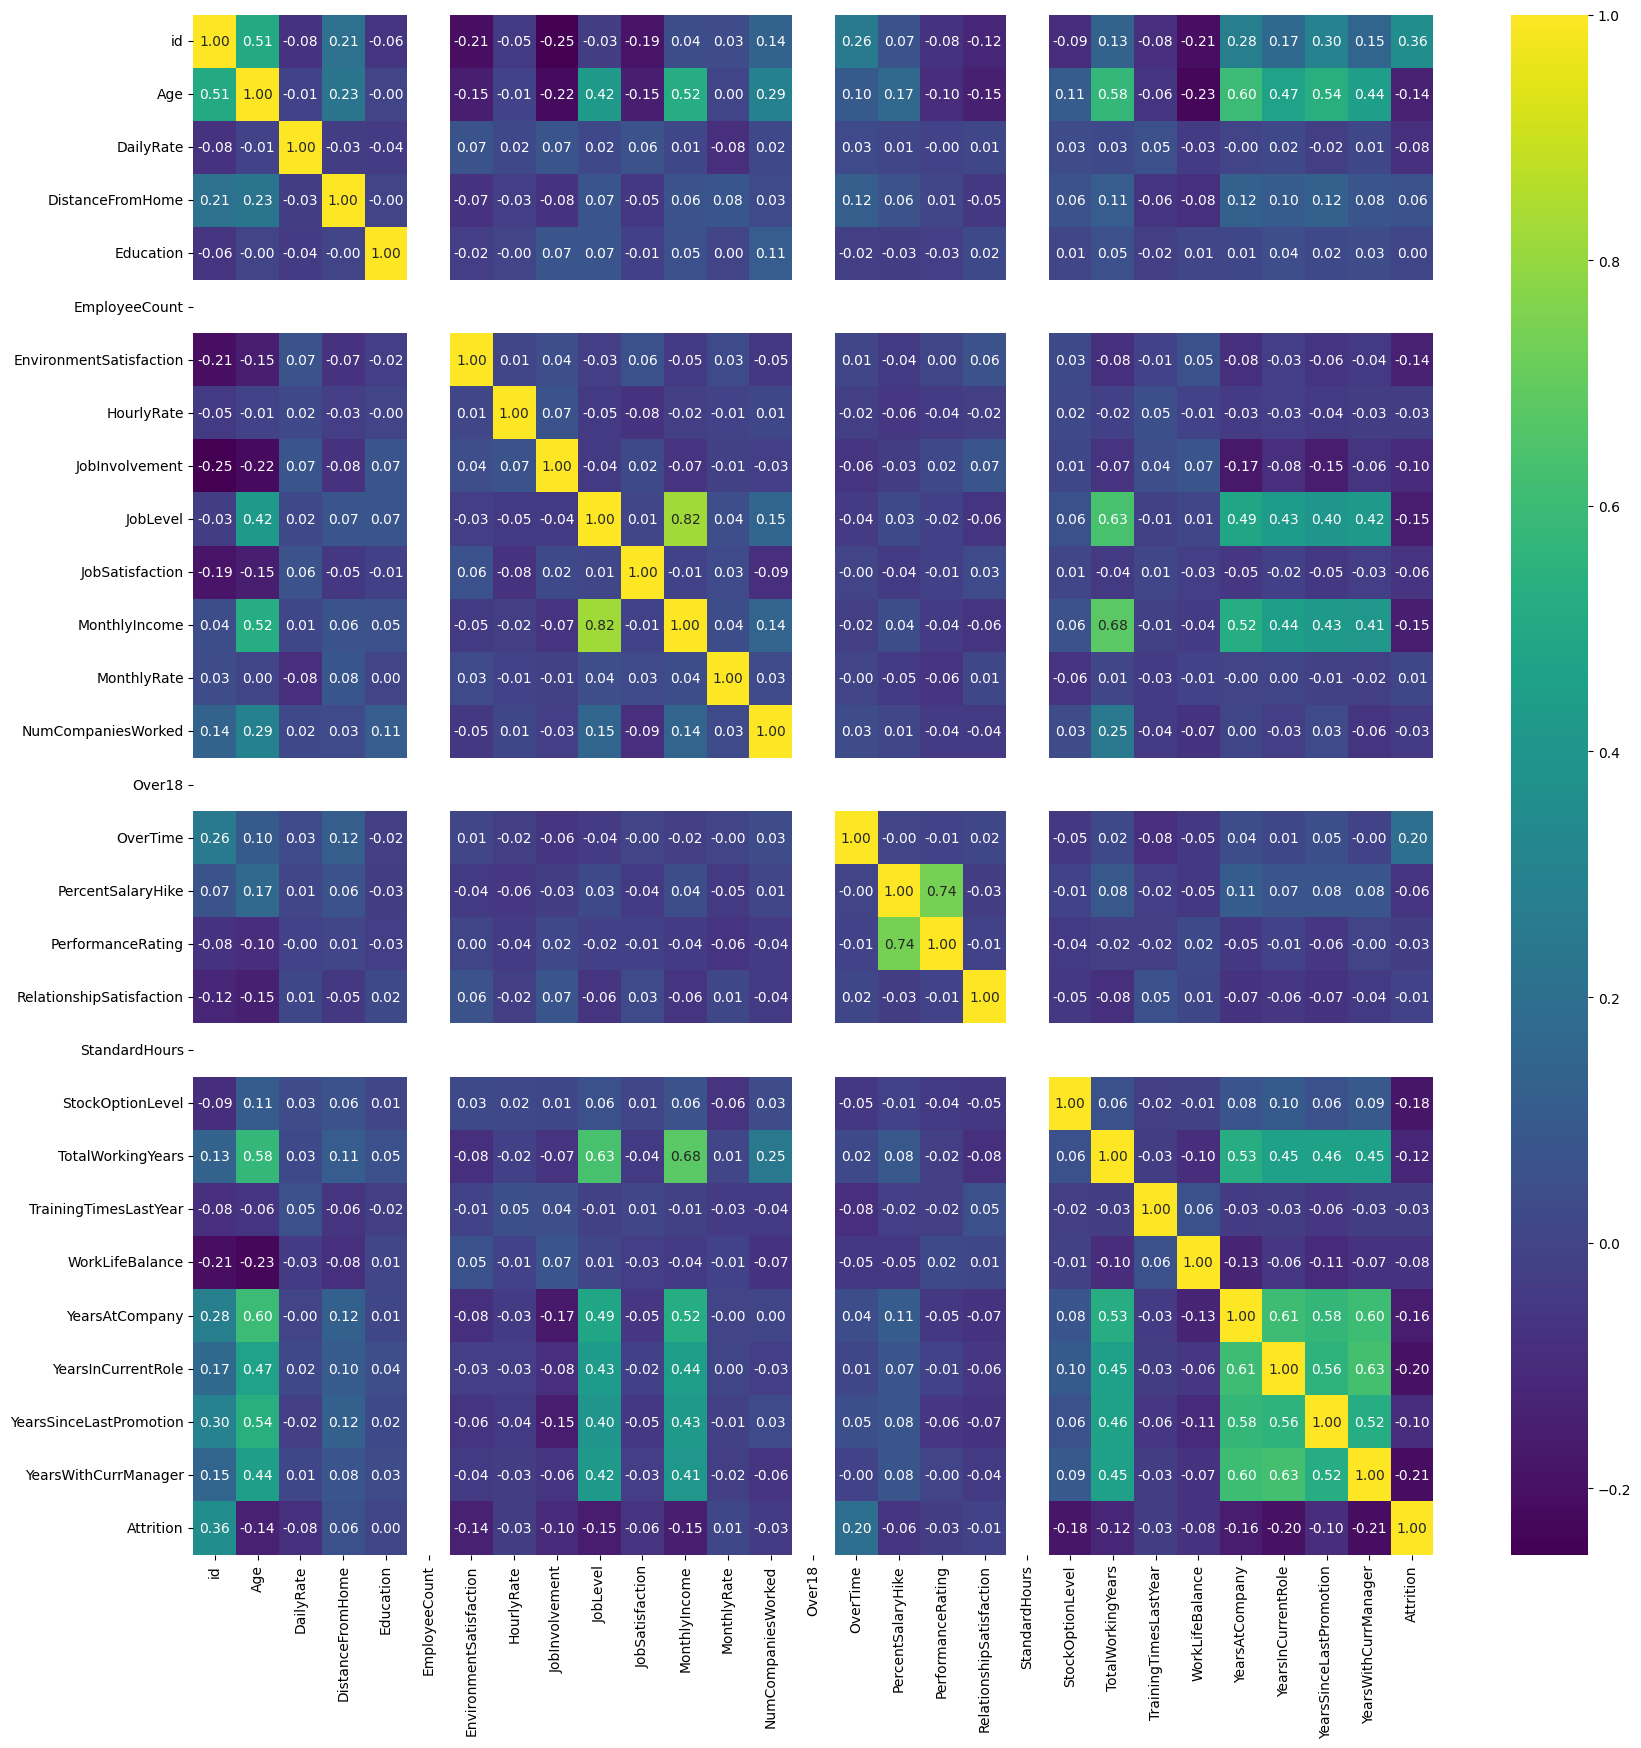

In [25]:
#let's check the correlation between the data
num_columns = data.select_dtypes(exclude='object')
plt.figure(figsize=(20,20))
sns.heatmap(num_columns.corr(),cmap='viridis',annot=True,fmt='.2f')
plt.show()

Attrition Correlations that are important to look into
1. Negative Correlation
* Age (-0.14)
* DailyRate (-0.08)
* EnvironmentSatisfaction (-0.14)
* HourlyRate (-0.03)
* JobInvolvement (-0.10)
* JobLevel (-0.15)
* JobSatisfaction (-0.06)
* MonthlyIncome (-0.15)
* NumCompaniesWorked (-0.03)
* PercentSalaryHike (-0.06)
* PerformanceRating (-0.03)
* StockOptionLevel (-0.18)
* TotalWorkingYears (-0.12)
* TrainingTimesLastYear (-0.03)
* WorkLifeBalance (-0.08)
* YearsAtCompany (-0.16)
* YearsInCurrentRole (-0.20)
* YearsSinceLastPromotion (-0.10)
* YearsWithCurrentManager (-0.21)

2. Positive Correlation
* DistanceFromHome (0.06)
* MonthlyRate (0.01)
* OverTime (0.20)


High Positive Correlations
1. YearsAtCompany and YearsInCurrentRole: 0.69
2. YearsAtCompany and YearsSinceLastPromotion: 0.62
3. YearsAtCompany and YearsWithCurrentManager: 0.52
4. YearsInCurrentRole and YearsWithCurrentManager: 0.76
5. YearsSinceLastPromotion and YearsWithCurrentManager: 0.54
6. TotalWorkingYears and YearsAtCompany: 0.58
7. MonthlyIncome and JobLevel: 0.82

# **Why Are Employees Leaving?**
We will visualize the data on continuous and categorical features to get a better view on why employees are leaving the company.

## **Continuous Features**

Continuous features represent numerical data that can take any value within a range. Visualizing these features helps us understand their distribution, identify outliers, and detect any skewness in the data.

We will visualize the following continuous features:
- `Age`
- `DailyRate`
- `HourlyRate`
- `MonthlyIncome`
- `MonthlyRate`
- `DistanceFromHome`
- `TrainingTimesLastYear`
- `TotalWorkingYears`
- `PercentSalaryHike`
- `YearsAtCompany`
- `YearsInCurrentRole`
- `YearsSinceLastPromotion`
- `YearsWithCurrManager`e learning models.


## Age vs Attrition

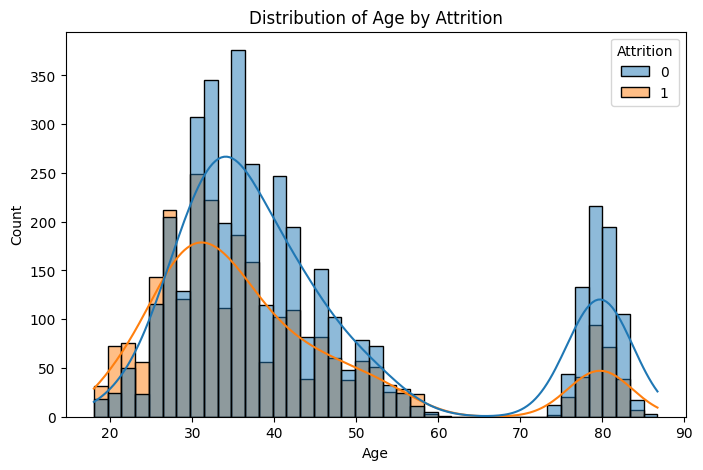

In [26]:

plt.figure(figsize=(8, 5));
sns.histplot(data=data, x='Age', hue='Attrition', kde=True)
plt.title("Distribution of Age by Attrition")
plt.show();


**Analysis suggests that employees around the age of 30 are more likely to leave the company. This may indicate a pivotal career transition period where individuals reassess their job satisfaction and career goals.**

## DailyRate vs Attrition

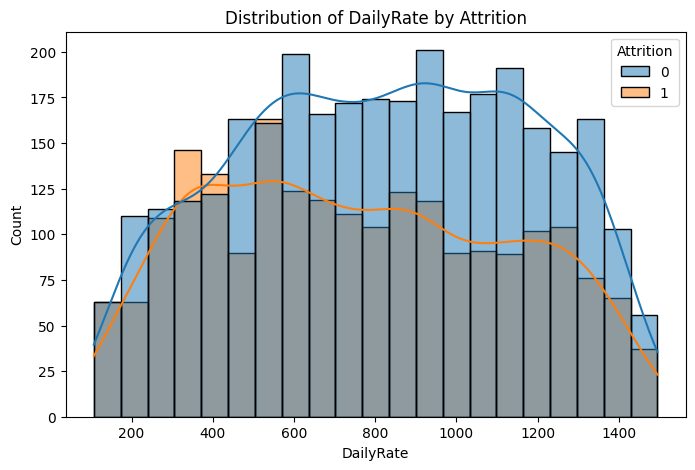

In [27]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='DailyRate', hue='Attrition', kde=True)
plt.title("Distribution of DailyRate by Attrition")
plt.show()

**There appears to be a correlation between lower daily rates and increased attrition, although this relationship is not strongly significant. It may imply that employees with lower compensation feel less valued or motivated, leading to higher turnover.**

## HourlyRate vs Attrition

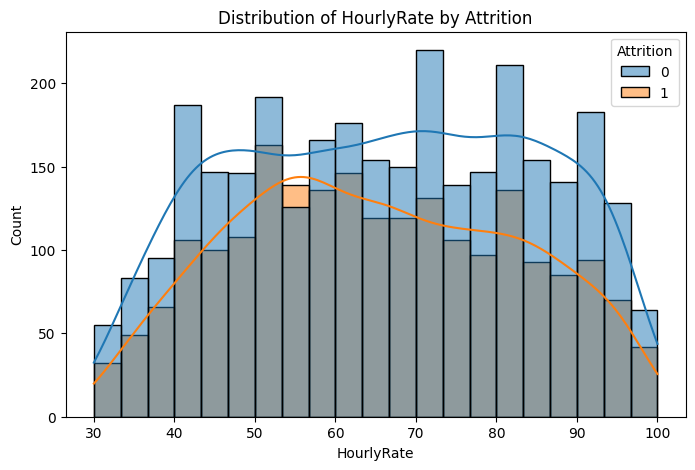

In [28]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='HourlyRate', hue='Attrition', kde=True)
plt.title("Distribution of HourlyRate by Attrition")
plt.show()

**The data indicates that employees earning an hourly rate of around $55 tend to exhibit higher rates of attrition. This could suggest that this pay level may not meet the expectations of employees, prompting them to seek better opportunities.**

## MonthlyIncome vs Attrition

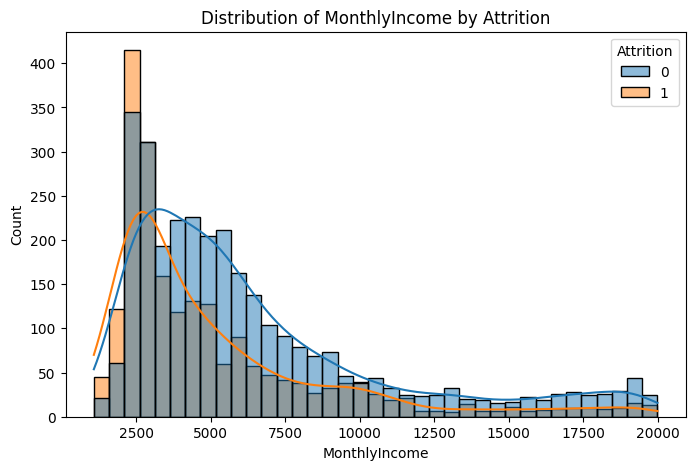

In [29]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='MonthlyIncome', hue='Attrition', kde=True)
plt.title("Distribution of MonthlyIncome by Attrition")
plt.show()


**Low monthly income seems to have a significant impact on employee turnover, suggesting that inadequate compensation may lead to dissatisfaction and a desire to leave for better-paying positions.**

## MonthlyRate vs Attrition

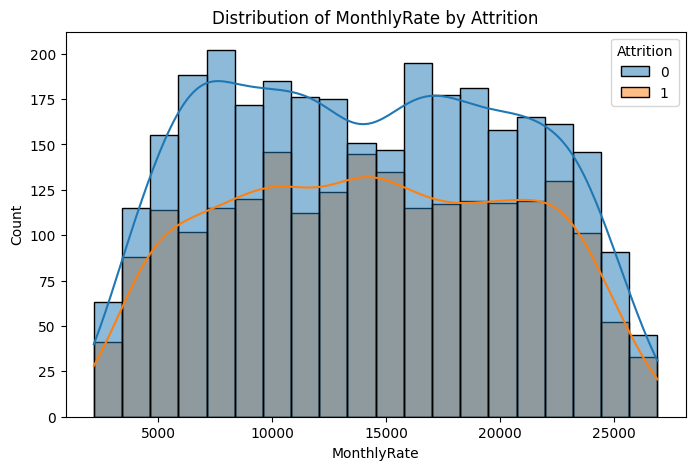

In [30]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='MonthlyRate', hue='Attrition', kde=True)
plt.title("Distribution of MonthlyRate by Attrition")
plt.show()


**The analysis indicates that monthly rates do not significantly influence employee turnover. This may suggest that other factors, such as job satisfaction or work environment, play a more critical role in employee retention.**

## DistanceFromHome vs Attrition

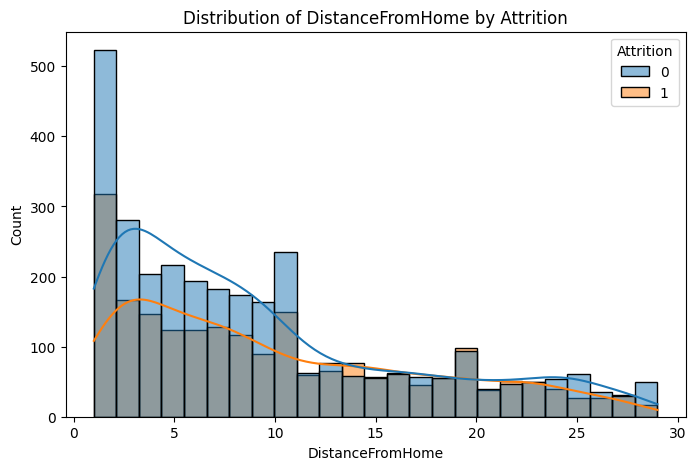

In [31]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='DistanceFromHome', hue='Attrition', kde=True)
plt.title("Distribution of DistanceFromHome by Attrition")
plt.show()


**Shorter commuting distances appear to correlate with higher employee turnover. This might indicate that employees living closer to work are more likely to explore other opportunities, possibly valuing convenience and flexibility over loyalty.**

## TotalWorkingYears vs Attrition

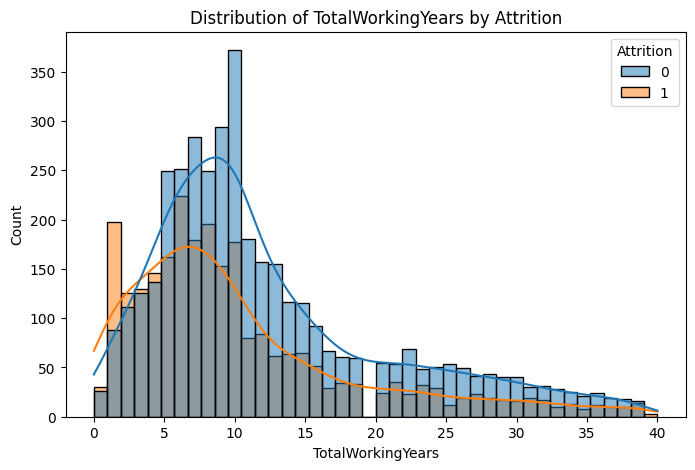

In [32]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='TotalWorkingYears', hue='Attrition', kde=True)
plt.title("Distribution of TotalWorkingYears by Attrition")
plt.show()


**Employees with fewer total working years tend to exhibit higher attrition rates. This suggests that newer employees may still be in the process of finding their fit within the organization, leading to a higher likelihood of leaving.**

## PercentSalaryHike vs Attrition

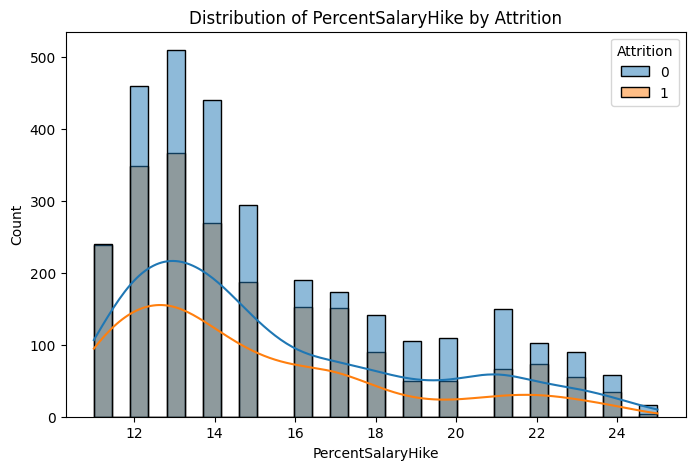

In [33]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='PercentSalaryHike', hue='Attrition', kde=True)
plt.title("Distribution of PercentSalaryHike by Attrition")
plt.show()



**Lower percentages of salary hikes are associated with increased attrition, indicating that employees who feel inadequately compensated for their contributions may choose to leave in search of better financial recognition.**

## YearsAtCompany vs Attrition

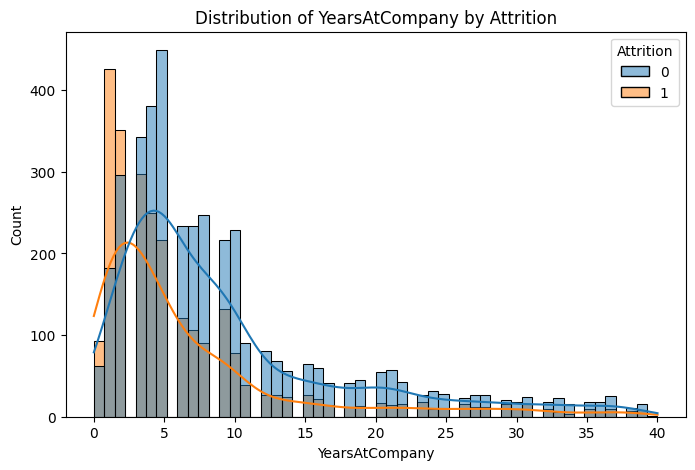

In [34]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='YearsAtCompany', hue='Attrition', kde=True)
plt.title("Distribution of YearsAtCompany by Attrition")
plt.show()


**Lower years at the company correlate with high attrition, which decreases significantly with increased tenure. This trend suggests that newer employees may lack attachment to the organization and are still assessing their fit, leading to higher turnover, while those with longer tenure often develop stronger relationships and commitment to the company.**

## YearsInCurrentRole vs Attrition

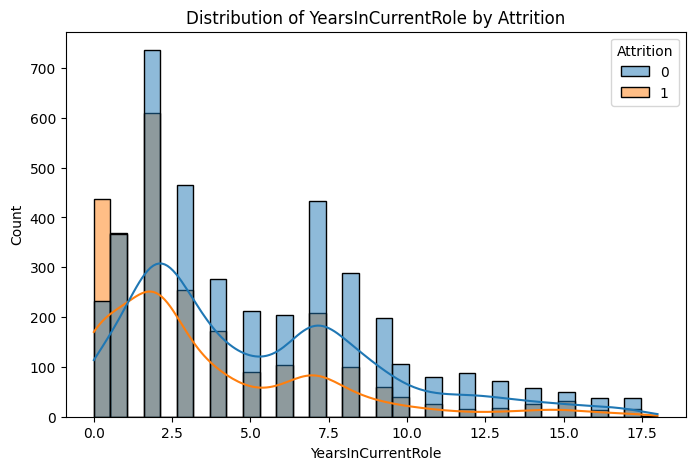

In [35]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='YearsInCurrentRole', hue='Attrition', kde=True)
plt.title("Distribution of YearsInCurrentRole by Attrition")
plt.show()


**High attrition is observed among employees with fewer years in their current role, which drops dramatically as tenure increases. This indicates that employees with less experience may feel dissatisfied and seek new opportunities, whereas increased tenure typically fosters confidence and security in their position.**

## YearsSinceLastPromotion vs Attrition

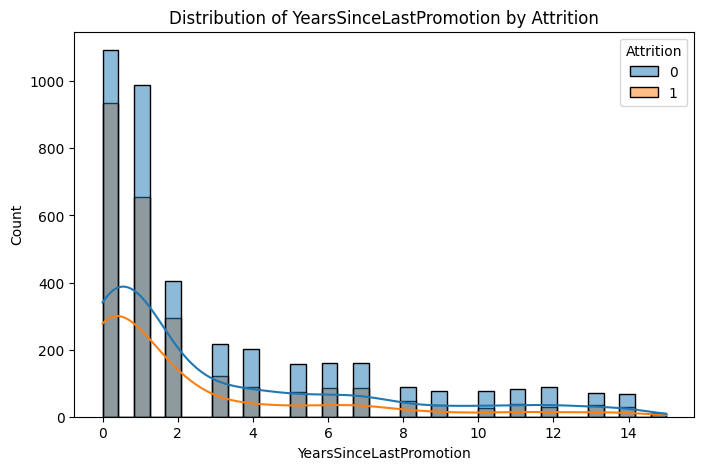

In [36]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='YearsSinceLastPromotion', hue='Attrition', kde=True)
plt.title("Distribution of YearsSinceLastPromotion by Attrition")
plt.show()


**Employees who have been in their roles for fewer years since their last promotion exhibit higher attrition rates, which significantly decreases with more years. This trend indicates that employees who haven’t been promoted recently may feel stagnant in their careers, leading to a desire to leave for new opportunities, while those who have had longer periods since their last promotion often feel more secure and engaged, resulting in lower turnover.**

## YearsWithCurrManager vs Attrition

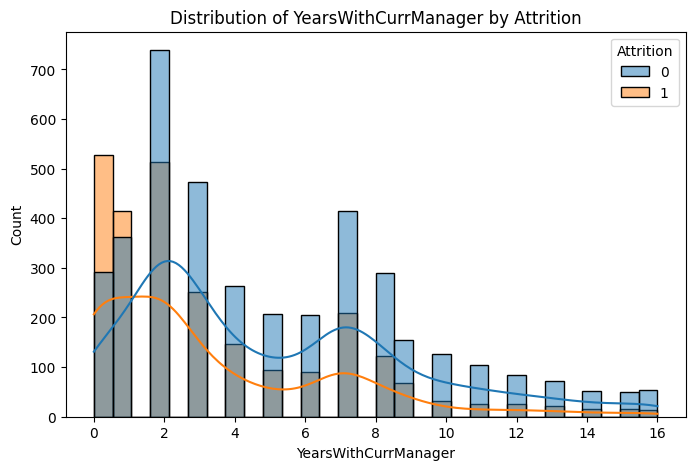

In [37]:

plt.figure(figsize=(8, 5))
sns.histplot(data=data, x='YearsWithCurrManager', hue='Attrition', kde=True)
plt.title("Distribution of YearsWithCurrManager by Attrition")
plt.show()


**High attrition is noted for employees with fewer years under their current manager, which decreases as tenure increases. This trend implies that a stronger rapport with a long-term manager can enhance job satisfaction, while shorter tenures may lead to uncertainty and higher attrition due to a lack of established trust and support.**

# **Categorical Numerical Features**
* EnvironmentSatisfaction
* JobInvolvement
* JobLevel
* JobSatisfaction
* NumCompaniesWorked
* OverTime
* PerformanceRating
* RelationshipSatisfaction
* StockOptionLevel
* WorkLifeBalance

## EnvironmentSatisfaction vs Attrition

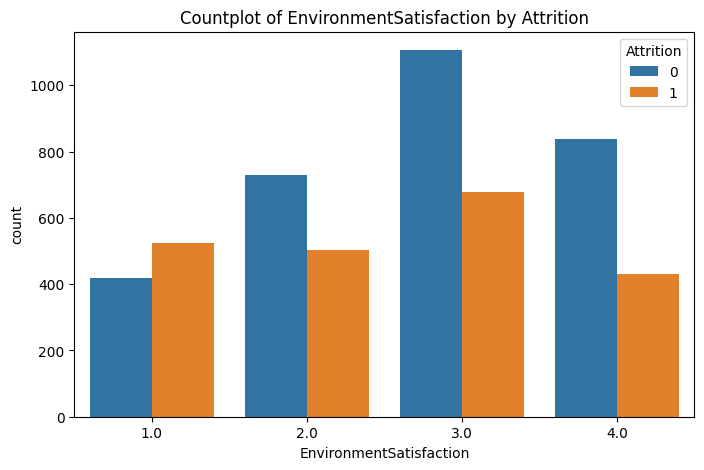

In [38]:

plt.figure(figsize=(8, 5));
sns.countplot(x='EnvironmentSatisfaction', hue='Attrition', data=data)
plt.title("Countplot of EnvironmentSatisfaction by Attrition")
plt.show();


1. Satisfaction Level 1.0: Attrition (orange) is quite high and comparable to non-attrition (blue),   indicating that low satisfaction might contribute to employees leaving.
2. Satisfaction Level 2.0: The number of non-attrition employees (blue) is higher than attrition employees (orange), though attrition is still significant.
3. Satisfaction Level 3.0: Non-attrition employees dominate here. There is a noticeable drop in attrition compared to satisfaction level 1 and 2.
4. Satisfaction Level 4.0: Similar to 3.0, non-attrition counts are much higher, and the attrition rate is lower, suggesting that higher satisfaction leads to less attrition.

**Higher Environment Satisfaction (levels 3 and 4) correlates with lower attrition, while lower satisfaction (level 1) is associated with higher attrition, suggesting that dissatisfaction in the work environment may be a key factor driving employee turnover.
This graph could suggest that improving environmental satisfaction may help reduce employee attrition.**

## JobInvolvement vs Attrition

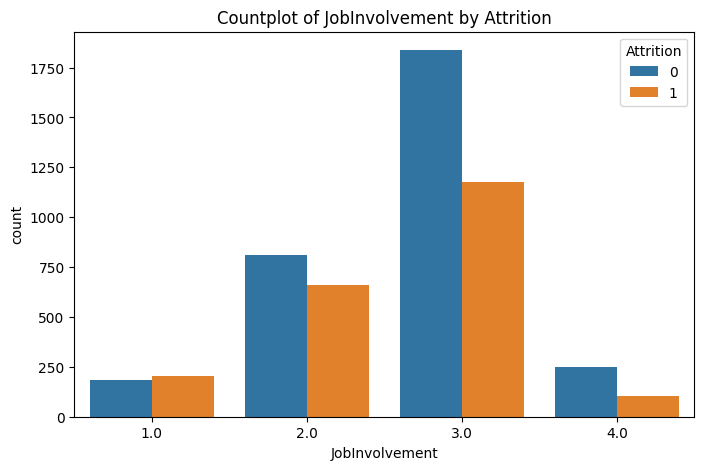

In [39]:

plt.figure(figsize=(8, 5));
sns.countplot(x='JobInvolvement', hue='Attrition', data=data)
plt.title("Countplot of JobInvolvement by Attrition")
plt.show();


**Higher job involvement (level 3) appears to be associated with lower attrition, while employees with moderate involvement (level 2) are more likely to leave, with minimal differences in attrition seen at the extremes (levels 1 and 4).**

## JobLevel vs Attrition

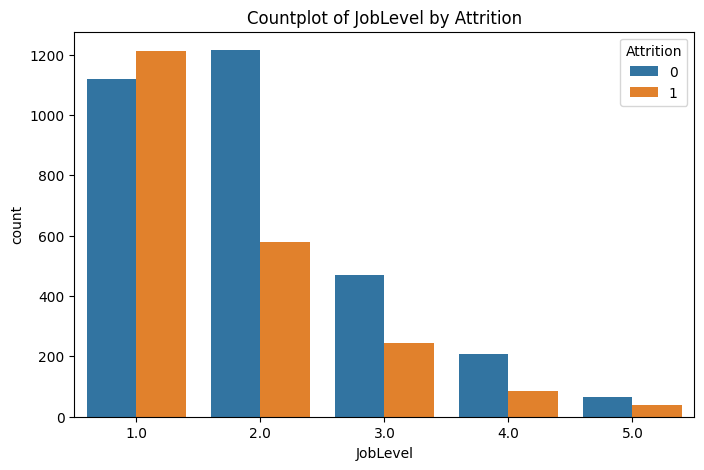

In [40]:

plt.figure(figsize=(8, 5));
sns.countplot(x='JobLevel', hue='Attrition', data=data)
plt.title("Countplot of JobLevel by Attrition")
plt.show();


**Attrition is highest at lower job levels (1 and 2), with the likelihood of leaving decreasing as job levels increase, especially in levels 3, 4, and 5, where fewer employees experience attrition.**

## JobSatisfaction vs Attrition

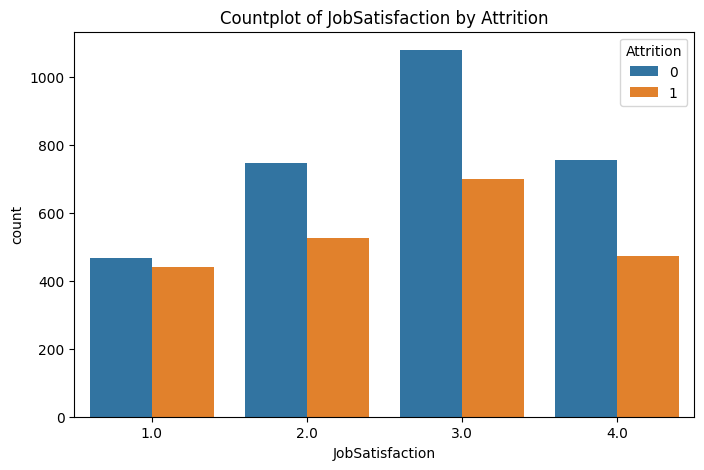

In [41]:

plt.figure(figsize=(8, 5));
sns.countplot(x='JobSatisfaction', hue='Attrition', data=data)
plt.title("Countplot of JobSatisfaction by Attrition")
plt.show();


1. At Job Satisfaction 1, the counts for both attrition and non-attrition are relatively close, suggesting that low job satisfaction may contribute to a higher likelihood of leaving.
2. At Job Satisfaction 2, the number of employees who left is slightly lower than those who stayed, but still significant.
3. At Job Satisfaction 3, there is a noticeable gap, with far more employees staying than leaving.
4. At Job Satisfaction 4, the gap is similar to level 3, indicating that higher job satisfaction is associated with lower attrition.

**Attrition is highest at lower job levels (1 and 2), with the likelihood of leaving decreasing as job levels increase, especially in levels 3, 4, and 5, where fewer employees experience attrition.**

## NumCompaniesWorked vs Attrition

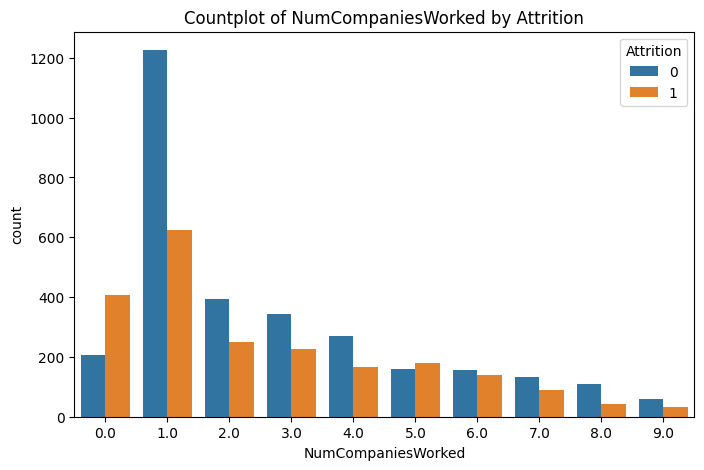

In [42]:

plt.figure(figsize=(8, 5));
sns.countplot(x='NumCompaniesWorked', hue='Attrition', data=data)
plt.title("Countplot of NumCompaniesWorked by Attrition")
plt.show();


- At 0 and 1 companies, there are significant numbers of both attrition and non-attrition cases. However, more employees who worked at only one company stayed compared to those who left.
- As the number of companies worked increases, the counts for both attrition and non-attrition gradually decrease.
- For higher numbers of companies (6+), the counts for attrition and non-attrition are fairly similar, suggesting no clear trend regarding leaving the organization based on having worked at many companies.

**The plot indicates that employees with fewer job changes (0-1 companies) are more likely to stay, while those with more job changes exhibit a more balanced distribution of staying and leaving.**

## OverTime vs Attrition

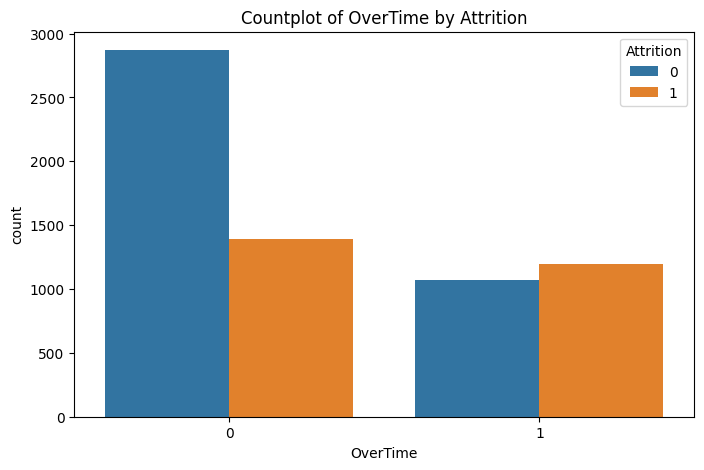

In [43]:

plt.figure(figsize=(8, 5));
sns.countplot(x='OverTime', hue='Attrition', data=data)
plt.title("Countplot of OverTime by Attrition")
plt.show();


**The plot suggests that working overtime is associated with a higher likelihood of attrition, while employees who do not work overtime are more likely to stay with the organization.**

## PerformanceRating vs Attrition

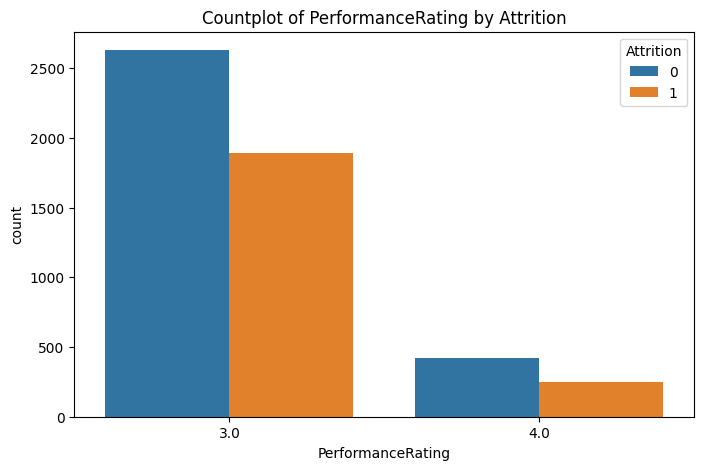

In [44]:

plt.figure(figsize=(8, 5));
sns.countplot(x='PerformanceRating', hue='Attrition', data=data)
plt.title("Countplot of PerformanceRating by Attrition")
plt.show();


**The graph suggests that attrition tends to be higher in employees with lower performance ratings, though there are still some high-performing employees who leave.**

## RelationshipSatisfaction vs Attrition

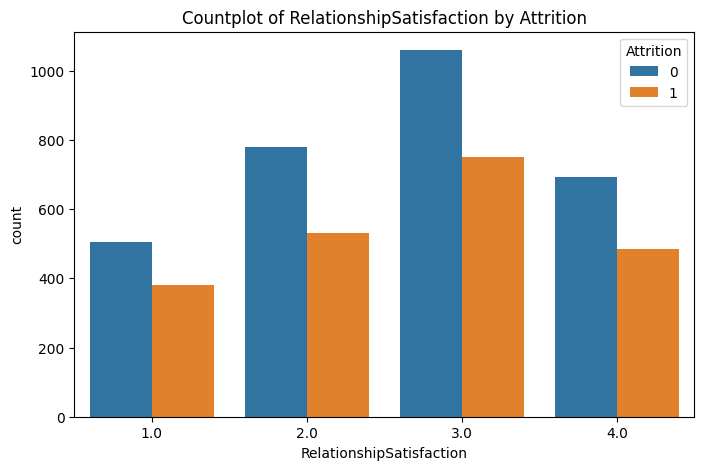

In [45]:

plt.figure(figsize=(8, 5));
sns.countplot(x='RelationshipSatisfaction', hue='Attrition', data=data)
plt.title("Countplot of RelationshipSatisfaction by Attrition")
plt.show();


## StockOptionLevel vs Attrition

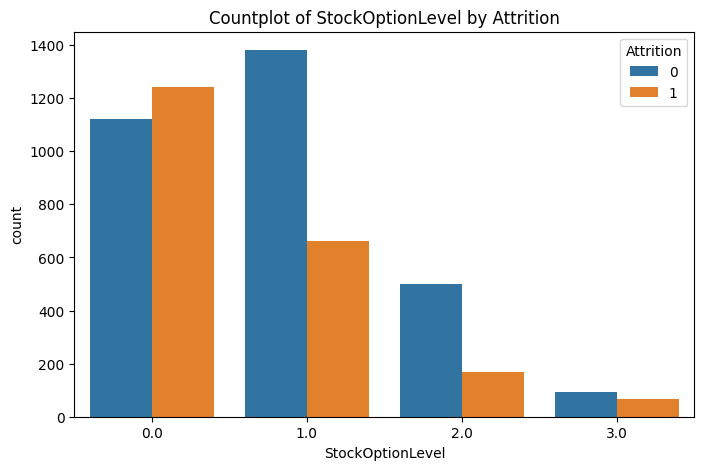

In [46]:

plt.figure(figsize=(8, 5));
sns.countplot(x='StockOptionLevel', hue='Attrition', data=data)
plt.title("Countplot of StockOptionLevel by Attrition")
plt.show();


## WorkLifeBalance vs Attrition

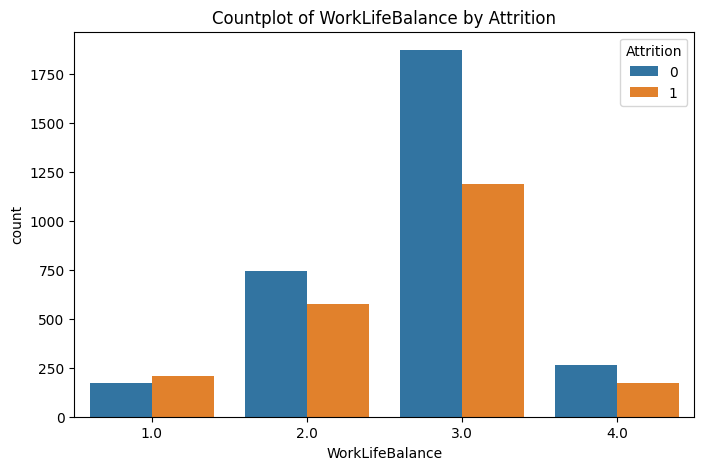

In [47]:

plt.figure(figsize=(8, 5));
sns.countplot(x='WorkLifeBalance', hue='Attrition', data=data)
plt.title("Countplot of WorkLifeBalance by Attrition")
plt.show();


- Most employees have a WorkLifeBalance of 3, and fewer have a balance of 1 or 4.
- Employees with better work-life balance (3 and 4) are less likely to leave.
- Those with lower work-life balance (1 and 2) tend to leave more often.

**Improving work-life balance might help reduce employee turnover.**

# **Categorical Features**
* BusinessTravel
* Department
* EducationField
* Gender
* JobRole
* MaritalStatus

## BusinessTravel vs Attrition

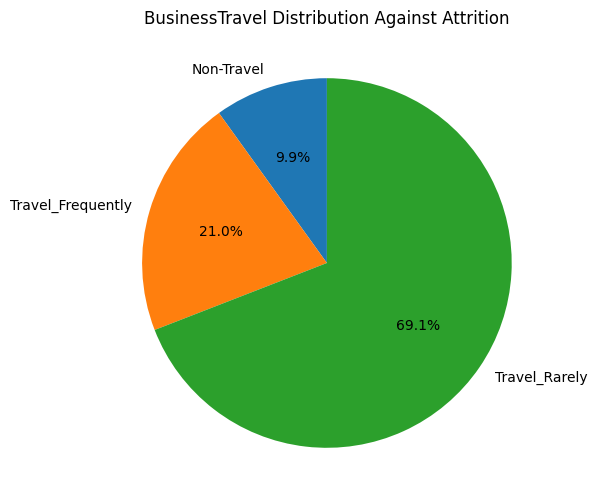

In [48]:

plt.figure(figsize=(8, 6))
attrition_counts = data.groupby(['BusinessTravel', 'Attrition']).size().unstack(fill_value=0)
plt.pie(attrition_counts.sum(axis=1), labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('BusinessTravel Distribution Against Attrition')
plt.show();


- 69.1% of employees who left traveled rarely for business.
- 21.0% of employees who left traveled frequently.
- 9.9% of employees who left did not travel for business at all.

**This suggests that employees who travel more frequently may be more likely to leave the company compared to those who rarely travel or do not travel at all.**

## Department vs Attrition

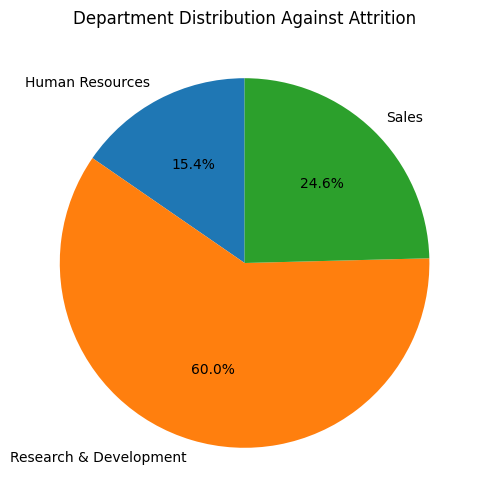

In [49]:

plt.figure(figsize=(8, 6))
attrition_counts = data.groupby(['Department', 'Attrition']).size().unstack(fill_value=0)
plt.pie(attrition_counts.sum(axis=1), labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Department Distribution Against Attrition')
plt.show();


**The majority of employees who left the company came from the Research & Development department, followed by Sales. Human Resources had the smallest proportion of attrition. This suggests that there may be higher turnover rates in Research & Development compared to other departments, indicating a potential area of concern for employee retention in that department.**

## EducationField vs Attrition

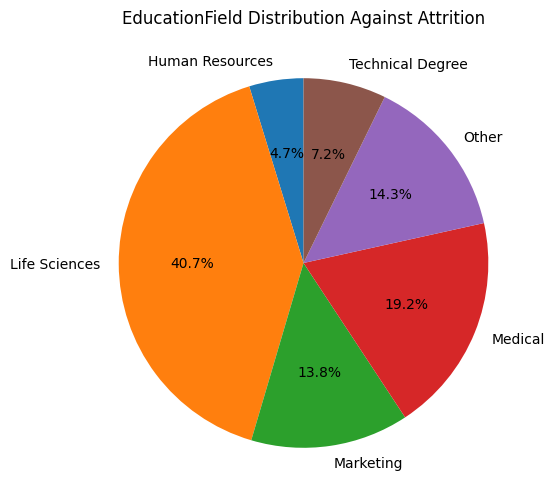

In [50]:

plt.figure(figsize=(8, 6))
attrition_counts = data.groupby(['EducationField', 'Attrition']).size().unstack(fill_value=0)
plt.pie(attrition_counts.sum(axis=1), labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('EducationField Distribution Against Attrition')
plt.show();


**The majority of employees who left the company had an educational background in Life Sciences, followed by Medical and Other fields. Those with a background in Human Resources and Technical Degrees represented the smallest share of attrition. This indicates that employees with Life Sciences or Medical backgrounds may have a higher likelihood of leaving, which could be worth investigating for better retention strategies in those fields.**

## Gender vs Attrition

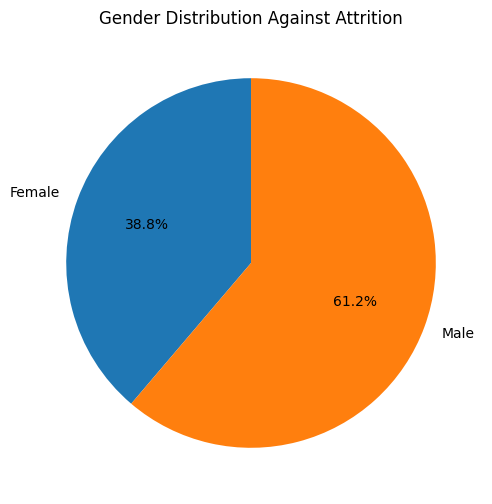

In [51]:

plt.figure(figsize=(8, 6))
attrition_counts = data.groupby(['Gender', 'Attrition']).size().unstack(fill_value=0)
plt.pie(attrition_counts.sum(axis=1), labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('Gender Distribution Against Attrition')
plt.show();


**The majority of employees who left the company were male, making up about 61% of the attrition, while females accounted for roughly 39%. This suggests that men are leaving the company at a higher rate than women, which could indicate a potential gender-related difference in attrition rates worth further investigation.**

## JobRole vs Attrition

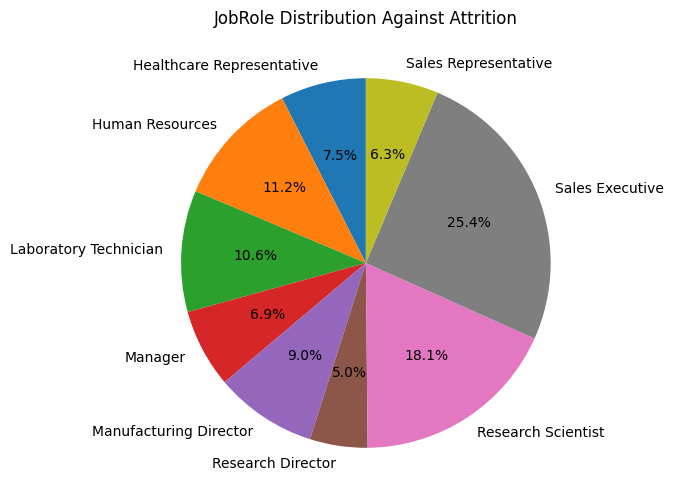

In [52]:

plt.figure(figsize=(8, 6))
attrition_counts = data.groupby(['JobRole', 'Attrition']).size().unstack(fill_value=0)
plt.pie(attrition_counts.sum(axis=1), labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('JobRole Distribution Against Attrition')
plt.show();


**The majority of employees who left the company were Sales Executives, followed by Research Scientists. Job roles like Human Resources, Laboratory Technicians, and Manufacturing Directors also contributed to attrition, though in smaller proportions. Sales Representatives and Research Directors had the lowest attrition rates among the job roles listed. This suggests that attrition is more concentrated in sales and research-related roles, indicating potential areas for targeted retention efforts.**

## MaritalStatus vs Attrition

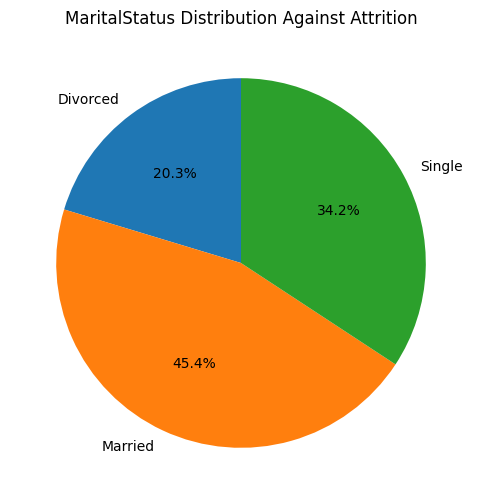

In [53]:

plt.figure(figsize=(8, 6))
attrition_counts = data.groupby(['MaritalStatus', 'Attrition']).size().unstack(fill_value=0)
plt.pie(attrition_counts.sum(axis=1), labels=attrition_counts.index, autopct='%1.1f%%', startangle=90)
plt.title('MaritalStatus Distribution Against Attrition')
plt.show();


**The majority of employees who left the company were married, making up 45.4% of the attrition, followed by single employees at 34.2%. Divorced employees had the smallest share of attrition at 20.3%. This suggests that marital status, particularly being married or single, might have a potential impact on employee attrition rates, and could be an area worth exploring further for retention strategies.**

## Causes of Attrition

1. **Age and Career Transitions**: Employees around the age of 30 are more likely to leave the company, likely due to reassessing their job satisfaction and career goals.
2. **Compensation Issues**:
   - **Lower daily and hourly rates** seem to be associated with higher attrition, suggesting that inadequate compensation may drive employees to seek better opportunities.
   - **Low monthly income** significantly impacts employee turnover, while **monthly rates** do not play a substantial role in attrition.
   - **Lower salary hikes** are linked to increased attrition, indicating that employees may leave if they feel financially undervalued.
3. **Commuting Distance**: Shorter commuting distances appear to correlate with higher attrition, suggesting employees living closer may value flexibility and seek new opportunities.
4. **Experience and Tenure**:
   - Employees with **fewer total working years** and **less tenure at the company** show higher attrition, as they may lack attachment and be more likely to leave.
   - **Fewer years in current roles** and **shorter periods since the last promotion** are associated with higher attrition, indicating dissatisfaction or a lack of career growth.
   - **Fewer years with the current manager** correlates with higher attrition, implying that rapport and trust with managers can reduce turnover.
5. **Job Satisfaction Factors**:
   - **Low environment satisfaction** drives turnover, highlighting the importance of a positive work environment.
   - **Lower job involvement** is associated with higher attrition, with employees feeling disengaged more likely to leave.
6. **Job Levels and Roles**:
   - Attrition is highest at **lower job levels**, decreasing as job levels increase.
   - **Sales Executives** and **Research Scientists** have the highest attrition rates among job roles.
7. **Work Patterns**:
   - **Overtime work** correlates with higher attrition, suggesting that work-life balance issues may play a role.
8. **Performance and Relationships**:
   - Employees with **lower performance ratings** are more likely to leave, though some high performers also exit.
   - **Higher relationship satisfaction** tends to reduce attrition, though the trend is not significant.
9. **Stock Options**: Employees with **higher stock option levels** tend to stay longer, showing a link between financial incentives and retention.
10. **Work-Life Balance**: **Poor work-life balance** is a key driver of attrition, particularly for employees working overtime.
11. **Business Travel**: Employees who **rarely or frequently travel** for work show higher attrition, indicating that travel demands may influence turnover.
12. **Department**: The **Research & Development** and **Sales** departments have the highest turnover rates, suggesting these areas need more attention for retention strategies.
13. **Education Fields**: Employees with backgrounds in **Life Sciences** and **Medical** fields have higher attrition rates compared to those in **Human Resources** or **Technical Degrees**.
14. **Gender**: More **males** leave the company compared to females, potentially indicating gender-related differences in attrition.
15. **Marital Status**: **Married employees** show the highest attrition rates, followed by **single** employees, indicating marital status mght influence retention.

### Recomendations to Reduce Attrition:

1. **Career Development**:
   - Offer **career growth opportunities** and **promotions** to address attrition caused by stagnation.
   - Implement **mentorship programs** to help newer employees establish a connection with the company and reduce early attrition.
2. **Compensation Adjustments**:
   - **Review and adjust pay** scales, especially for hourly and lower-paid employees, to ensure competitive compensation.
   - Provide **regular salary hikes** tied to performance to ensure employees feel financially recognized for their contributions.
3. **Enhance Job Satisfaction**:
   - Improve **work-life balance** by limiting overtime and offering flexible working arrangements.
   - Focus on creating a **positive work environment** to enhance satisfaction and reduce turnover.
4. **Employee Retention Programs**:
   - Create **retention programs** for high-turnover departments like **Research & Development** and **Sales** to address department-specific challenges.
   - Offer **stock options** or other financial incentives to encourage long-term commitment.
5. **Business Travel Reassessment**: Reevaluate the necessity of **frequent business travel**, as it may be contributing to higher turnover.
6. **Recognition and Support**:
   - **Recognize employees** for their contributions to ensure they feel valued, particularly in high attrition roles like **Sales Executives** and **Research Scientists**.
   - **Foster strong manager-employee relationships**, as longer tenures with managers correlate with lower attrition.
7. **Targeted Retention Efforts**:
   - Address **gender-related attrition** by exploring whether workplace policies or dynamics contribute to a higher male turnover rate.
   - Investigate how **marital status** may influence retention and consider offering family-friendly benefits to married employees.

By addressing these areas, the company can potentially reduce employee turnover and improve retention rates.and 3.0.and 3.0.

# Data Preprocessing and Feature Engineering

## Handling High Correlations

Highly correlated features can introduce multicollinearity, which can negatively impact certain machine learning models. When two or more features are highly correlated, they provide redundant information. To address this, we will either combine or drop some features.

#### High Positive Correlations Identified:
1. **YearsAtCompany** and **YearsInCurrentRole**: 0.69
2. **YearsAtCompany** and **YearsSinceLastPromotion**: 0.62
3. **YearsAtCompany** and **YearsWithCurrentManager**: 0.52
4. **YearsInCurrentRole** and **YearsWithCurrentManager**: 0.76
5. **YearsSinceLastPromotion** and **YearsWithCurrentManager**: 0.54
6. **TotalWorkingYears** and **YearsAtCompany**: 0.58
7. **MonthlyIncome** and **JobLevel**: 0.82

#### Strategy:
- **Combine**: We will combine the highly correlated features with `YearsAtCompany` to create new ratio features. This will capture relationships between these variables without redundancy.
- **Drop**: Once combined, the original highly correlated features will be dropped.
- For **MonthlyIncome** and **JobLevel**, we will **keep MonthlyIncome** and **drop JobLevel** due to the strong correlation (0.82).


In [54]:
data['RoleTenureRatio'] = data['YearsInCurrentRole'] / data['YearsAtCompany']
data['ManagerTenureRatio'] = data['YearsWithCurrManager'] / data['YearsAtCompany']
data['PromotionGapRatio'] = data['YearsSinceLastPromotion'] / data['YearsAtCompany']
data = data.drop(columns=['YearsInCurrentRole', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'JobLevel'])

In [55]:
data.head()

,id,Age,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,EnvironmentSatisfaction,Gender,HourlyRate,JobInvolvement,JobRole,JobSatisfaction,MaritalStatus,MonthlyIncome,MonthlyRate,NumCompaniesWorked,Over18,OverTime,PercentSalaryHike,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,Attrition,RoleTenureRatio,ManagerTenureRatio,PromotionGapRatio
0,7000,44.0,NaN,NaN,Human Resources,NaN,NaN,Marketing,NaN,NaN,Female,NaN,NaN,Manager,NaN,Single,NaN,NaN,NaN,1,1,NaN,NaN,NaN,NaN,NaN,17,3,NaN,7,0,0.714286,0.285714,0.714286
1,7001,28.0,Travel_Rarely,949.0,Human Resources,7.0,4.0,Technical Degree,1.0,3.0,Male,83.0,3.0,Sales Executive,4.0,Divorced,4608.0,8499.0,0.0,1,1,12.0,3.0,3.0,80.0,1.0,6,3,3.0,5,1,0.400000,0.600000,0.000000
2,7002,26.0,Travel_Rarely,566.0,Human Resources,10.0,3.0,Medical,1.0,3.0,Male,46.0,3.0,Research Scientist,4.0,Single,4770.0,9142.0,1.0,1,0,13.0,3.0,1.0,80.0,0.0,5,4,3.0,5,0,0.600000,0.400000,0.200000
3,7003,34.0,Travel_Frequently,512.0,Sales,3.0,3.0,Medical,1.0,1.0,Male,47.0,2.0,Sales Executive,4.0,Married,8194.0,11053.0,3.0,1,0,13.0,3.0,1.0,80.0,1.0,14,2,3.0,12,0,0.666667,0.916667,0.083333
4,7004,34.0,Travel_Rarely,475.0,Research & Development,12.0,1.0,Medical,1.0,2.0,Female,51.0,3.0,Research Scientist,4.0,Single,3691.0,18185.0,3.0,1,0,17.0,3.0,1.0,80.0,0.0,5,4,3.0,3,0,0.666667,0.666667,0.000000


In [56]:
data.shape

(6530, 34)

## **Handling Outliers**

Outliers are extreme values that deviate significantly from the rest of the data. These values can distort statistical analyses and negatively affect machine learning models, leading to reduced model performance or inaccurate predictions.

We identified the following features with potential outliers:
- `Age`
- `MonthlyIncome`
- `TotalWorkingYears`
- `YearsAtCompany`
- `PercentSalaryHike`
- `NumCompaniesWorked`
- `TrainingTimesLastYear`

To handle these outliers, we will cap them to a specific range using the 5th and 95th percentiles. This ensures that extreme values are limited, reducing their influence while preserving the majority of the data.


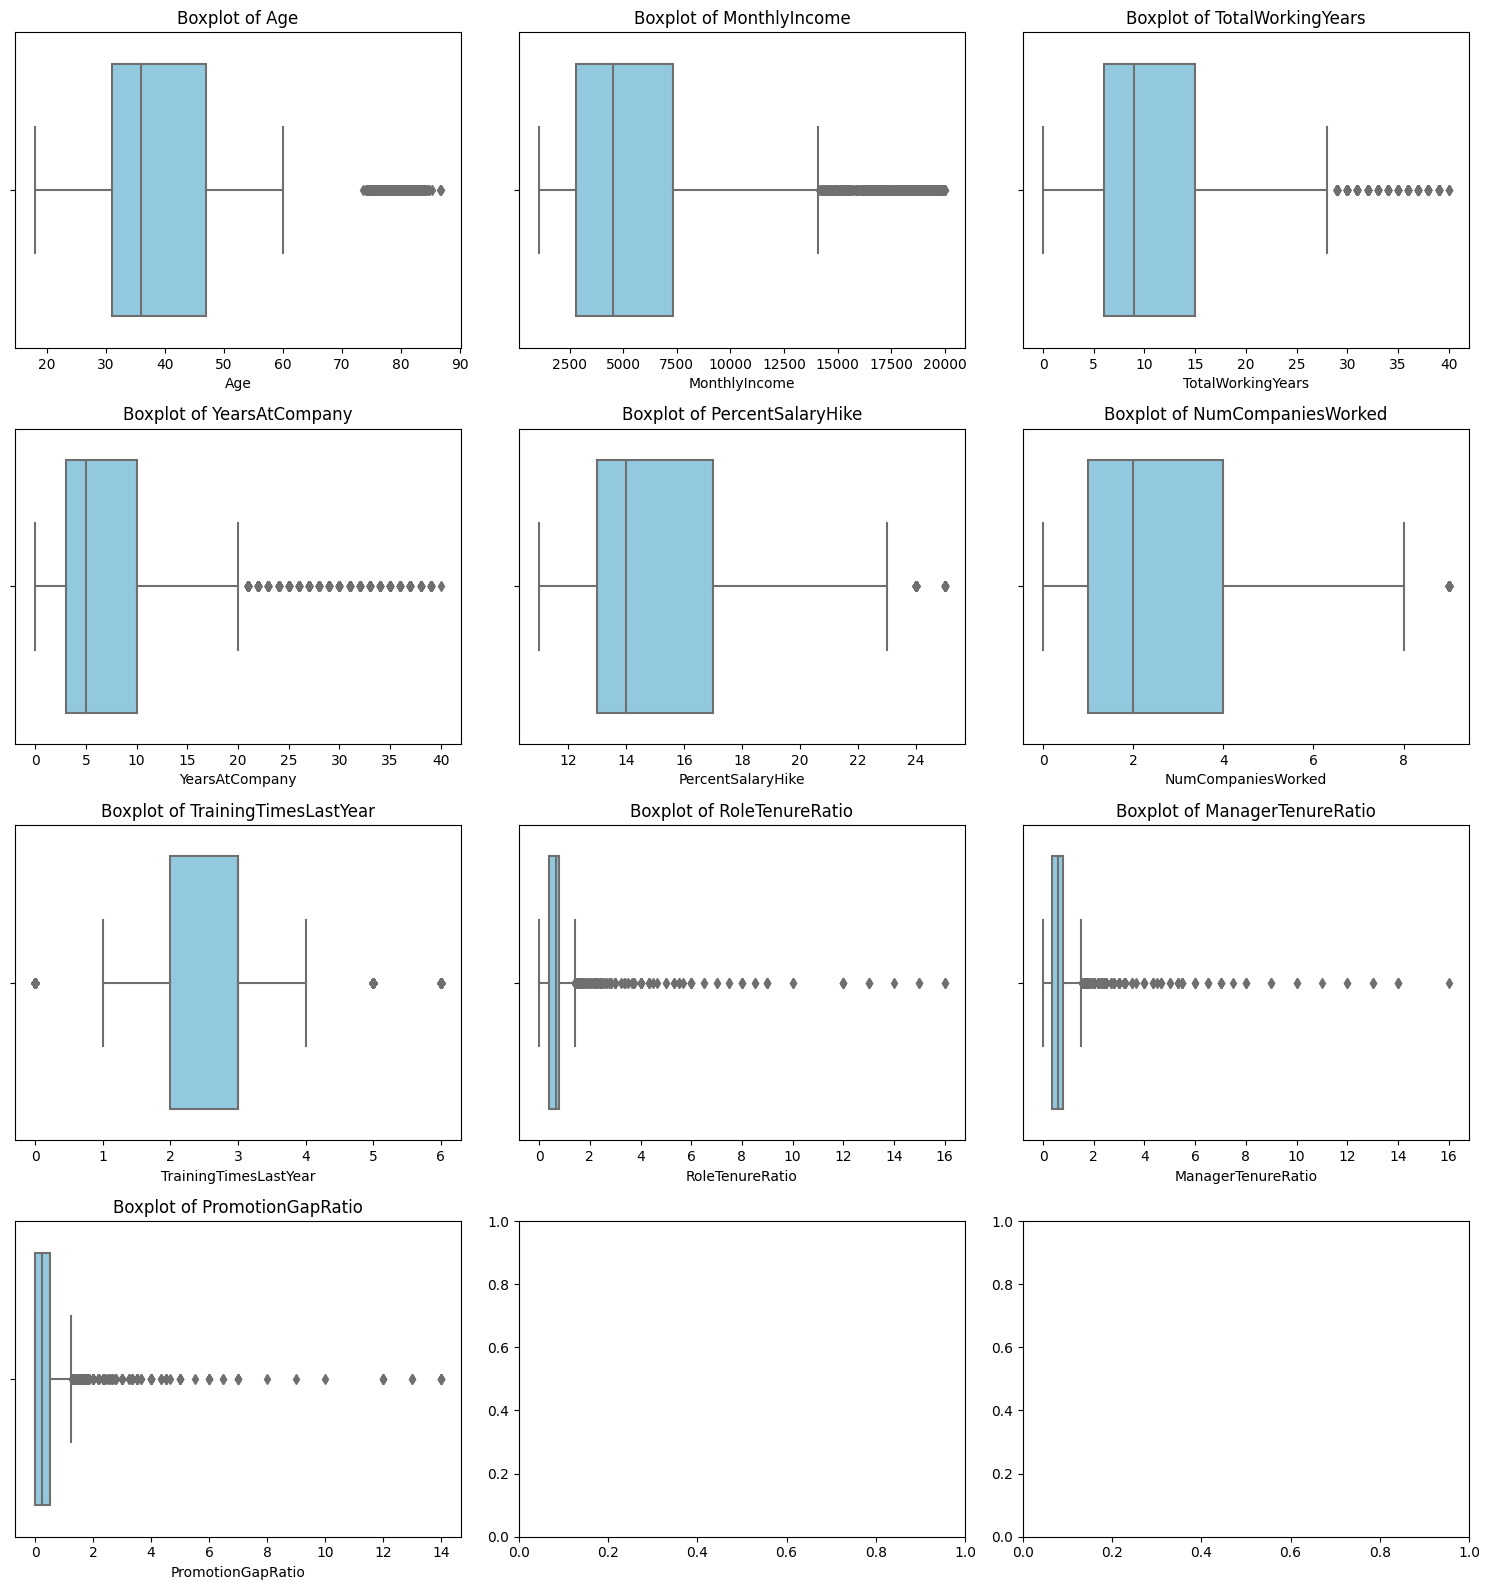

In [57]:

columns_with_outliers = [
    'Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike',
    'NumCompaniesWorked', 'TrainingTimesLastYear', 'RoleTenureRatio', 'ManagerTenureRatio', 'PromotionGapRatio'
]
n_rows = 4 
n_cols = 3

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 16))
axes = axes.flatten()

for i, column in enumerate(columns_with_outliers):
    if i < len(columns_with_outliers):
        sns.boxplot(data=data, x=column, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {column}')
    else:
        axes[i].axis('off') 
        
plt.tight_layout()
plt.show()


#### Outlier Capping
Outliers can significantly impact the performance of machine learning models by skewing results or increasing model variance. To address this, we can apply **outlier capping**. This method caps extreme values by limiting them to a specific range, defined by percentiles (e.g., 5th and 95th percentiles).

In this case, we cap the following features to the 5th and 95th percentiles:
- `Age`
- `TotalWorkingYears`
- `YearsAtCompany`
- `PercentSalaryHike`
- `NumCompaniesWorked`
- `TrainingTimesLastYear`
- `RoleTenureRatio`
- `ManagerTenureRatio`
- `PromotionGapRatio`

This ensures that values outside this range are clipped to the upper or lower limits, reducing the influence of outliers.


In [58]:
def cap_outliers(data, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_cap = data[column].quantile(lower_percentile)
    upper_cap = data[column].quantile(upper_percentile)
    data[column] = data[column].clip(lower=lower_cap, upper=upper_cap)
    return data

data = cap_outliers(data, 'Age', lower_percentile=0.05, upper_percentile=0.95)
data = cap_outliers(data, 'TotalWorkingYears', lower_percentile=0.05, upper_percentile=0.95)
data = cap_outliers(data, 'YearsAtCompany', lower_percentile=0.05, upper_percentile=0.95)
data = cap_outliers(data, 'PercentSalaryHike', lower_percentile=0.05, upper_percentile=0.95)
data = cap_outliers(data, 'NumCompaniesWorked', lower_percentile=0.05, upper_percentile=0.95)
data = cap_outliers(data, 'TrainingTimesLastYear', lower_percentile=0.05, upper_percentile=0.95)
data = cap_outliers(data, 'RoleTenureRatio', lower_percentile=0.05, upper_percentile=0.95)
data = cap_outliers(data, 'ManagerTenureRatio', lower_percentile=0.05, upper_percentile=0.95)
data = cap_outliers(data, 'PromotionGapRatio', lower_percentile=0.05, upper_percentile=0.95)

#### Log Transformation
Some features, such as income or monetary values, may have a skewed distribution, which can impact model performance. To address this, we apply **log transformation** to the `MonthlyIncome` feature.

Log transformation helps in compressing the range of the feature, reducing the effect of large outliers and making the distribution closer to normal (Gaussian). This is important for machine learning algorithms that assume normally distributed input data.

We use `np.log1p()` to apply the logarithm, which handles zero values by adding 1 before taking the log (to avoid log(0) issues).


In [59]:
def log_transform(data, column):
    data[column] = np.log1p(data[column])
    return data

data = log_transform(data, 'MonthlyIncome')

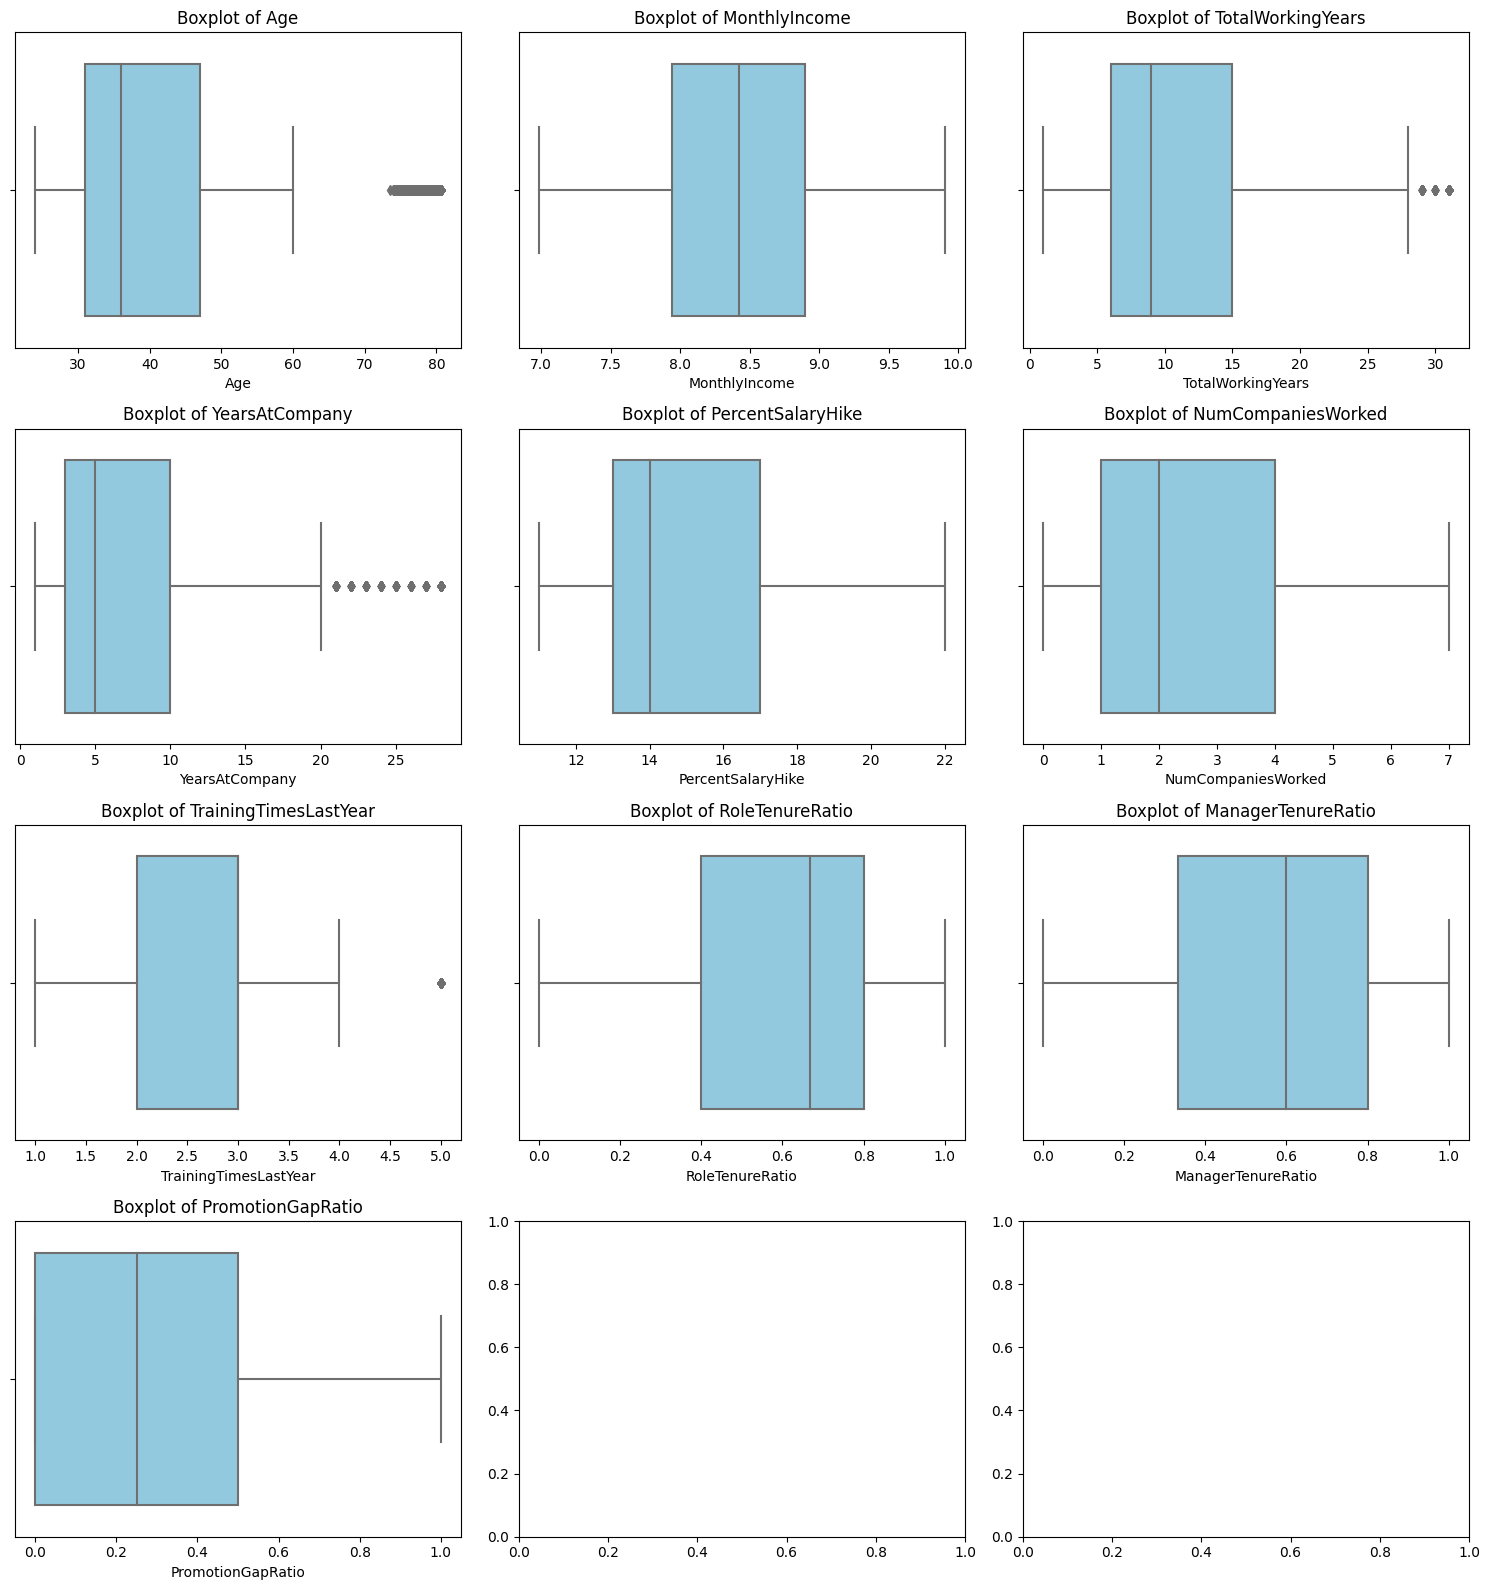

In [60]:

columns_with_outliers = [
    'Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike',
    'NumCompaniesWorked', 'TrainingTimesLastYear', 'RoleTenureRatio', 'ManagerTenureRatio', 'PromotionGapRatio'
]

n_rows = 4 
n_cols = 3

# Set up the figure for a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 16))  # Increase figsize for better spacing
axes = axes.flatten()

# Create boxplots for each column
for i, column in enumerate(columns_with_outliers):
    if i < len(columns_with_outliers):  # Ensure the loop only runs for the available columns
        sns.boxplot(data=data, x=column, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {column}')
    else:
        axes[i].axis('off')  # Turn off any unused subplots

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


There are still outliers!.

For the following features, we manually chose boundaries to clip the outliers:
- `Age`: Lower bound set to 20, upper bound set to 60.
- `TotalWorkingYears`: Upper bound set to 35.
- `YearsAtCompany`: Upper bound set to 30.
- `TrainingTimesLastYear`: Upper bound set to 4.

These values were chosen based on common sense, industry knowledge, and an understanding of reasonable limits for each feature.


In [61]:
data['Age'] = data['Age'].clip(lower=20, upper=60)
data['TotalWorkingYears'] = data['TotalWorkingYears'].clip(upper=35)
data['YearsAtCompany'] = data['YearsAtCompany'].clip(upper=30)
data['TrainingTimesLastYear'] = data['TrainingTimesLastYear'].clip(upper=4)

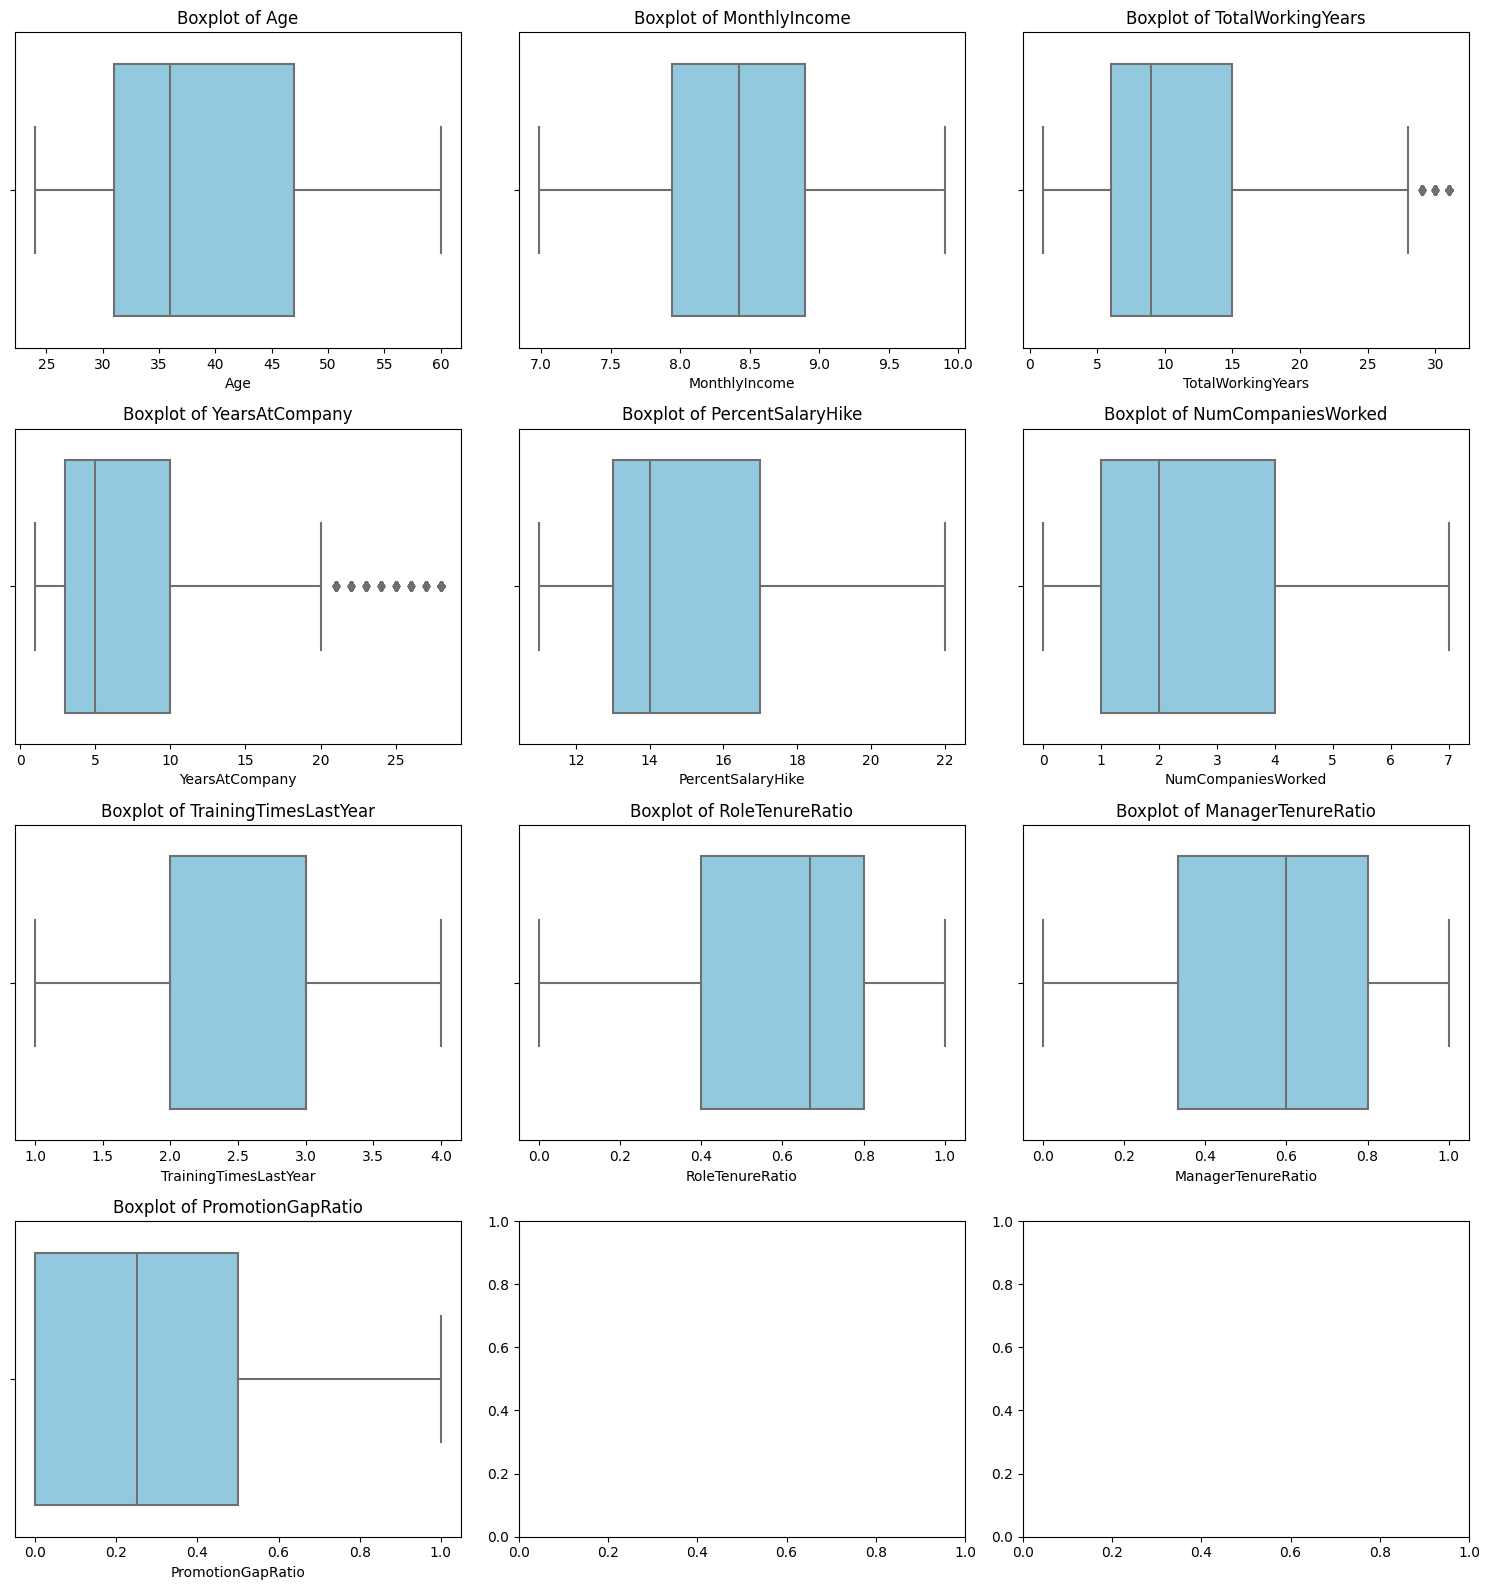

In [62]:

columns_with_outliers = [
    'Age', 'MonthlyIncome', 'TotalWorkingYears', 'YearsAtCompany', 'PercentSalaryHike',
    'NumCompaniesWorked', 'TrainingTimesLastYear', 'RoleTenureRatio', 'ManagerTenureRatio', 'PromotionGapRatio'
]

# Define number of rows and columns for the grid
n_rows = 4  # Increase to fit more plots
n_cols = 3  # Adjust based on number of plots

# Set up the figure for a grid of subplots
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 16))  # Increase figsize for better spacing
axes = axes.flatten()

# Create boxplots for each column
for i, column in enumerate(columns_with_outliers):
    if i < len(columns_with_outliers):  # Ensure the loop only runs for the available columns
        sns.boxplot(data=data, x=column, ax=axes[i], color='skyblue')
        axes[i].set_title(f'Boxplot of {column}')
    else:
        axes[i].axis('off')  # Turn off any unused subplots

# Adjust layout for better spacing
plt.tight_layout()
plt.show()


## **Encoding Categorical Values**

Machine learning models require input data to be in numerical form. Categorical variables must be converted into numeric values through encoding. 

For this dataset, we will encode the following categorical features:
- `BusinessTravel`
- `Department`
- `EducationField`
- `Gender`
- `JobRole`
- `MaritalStatus`

We will use **one-hot encoding** for most features and **label encoding** or `Gender`.
ationships.


In [63]:
data.select_dtypes(include=['object']).columns

Index(['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole',
       'MaritalStatus'],
      dtype='object')

In [64]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

object_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']
one_hot_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']
data = pd.get_dummies(data, columns=one_hot_columns, drop_first=True)

label_encoder = LabelEncoder()
data['Gender'] = label_encoder.fit_transform(data['Gender'])


## **Handling Missing Values**

Missing values can be problematic for machine learning models as many algorithms cannot handle missing data directly. For this dataset, we identified several features with potential missing values. To address these missing values, we will use **K-Nearest Neighbors (KNN) imputation**.

#### Features with potential missing values:
- `BusinessTravel`
- `DailyRate`
- `DistanceFromHome`
- `Education`
- `EmployeeCount`
- `EnvironmentSatisfaction`
- `HourlyRate`
- `JobInvolvement`
- `JobSatisfaction`
- `MonthlyIncome`
- `MonthlyRate`
- `NumCompaniesWorked`
- `PercentSalaryHike`
- `PerformanceRating`
- `RelationshipSatisfaction`
- `StandardHours`
- `StockOptionLevel`
- `WorkLifeBalance`
- `RoleTenureRatio`
- `ManagerTenureRatio`
- `PromotionGapRatio`

### Why KNN Imputation?
K-Nearest Neighbors (KNN) imputation is a robust method for filling missing values by using the values from the nearest neighbors. This method considers the similarity between data points and uses the nearest 'k' data points to estimate the missing values.
e type of data they contain.


In [65]:
data.isnull().sum()

id                                      0
Age                                     0
DailyRate                            1314
DistanceFromHome                     1323
Education                            1318
EmployeeCount                        1309
EnvironmentSatisfaction              1300
Gender                                  0
HourlyRate                           1329
JobInvolvement                       1305
JobSatisfaction                      1344
MonthlyIncome                        1322
MonthlyRate                          1336
NumCompaniesWorked                   1309
Over18                                  0
OverTime                                0
PercentSalaryHike                    1314
PerformanceRating                    1338
RelationshipSatisfaction             1348
StandardHours                        1291
StockOptionLevel                     1294
TotalWorkingYears                       0
TrainingTimesLastYear                   0
WorkLifeBalance                   

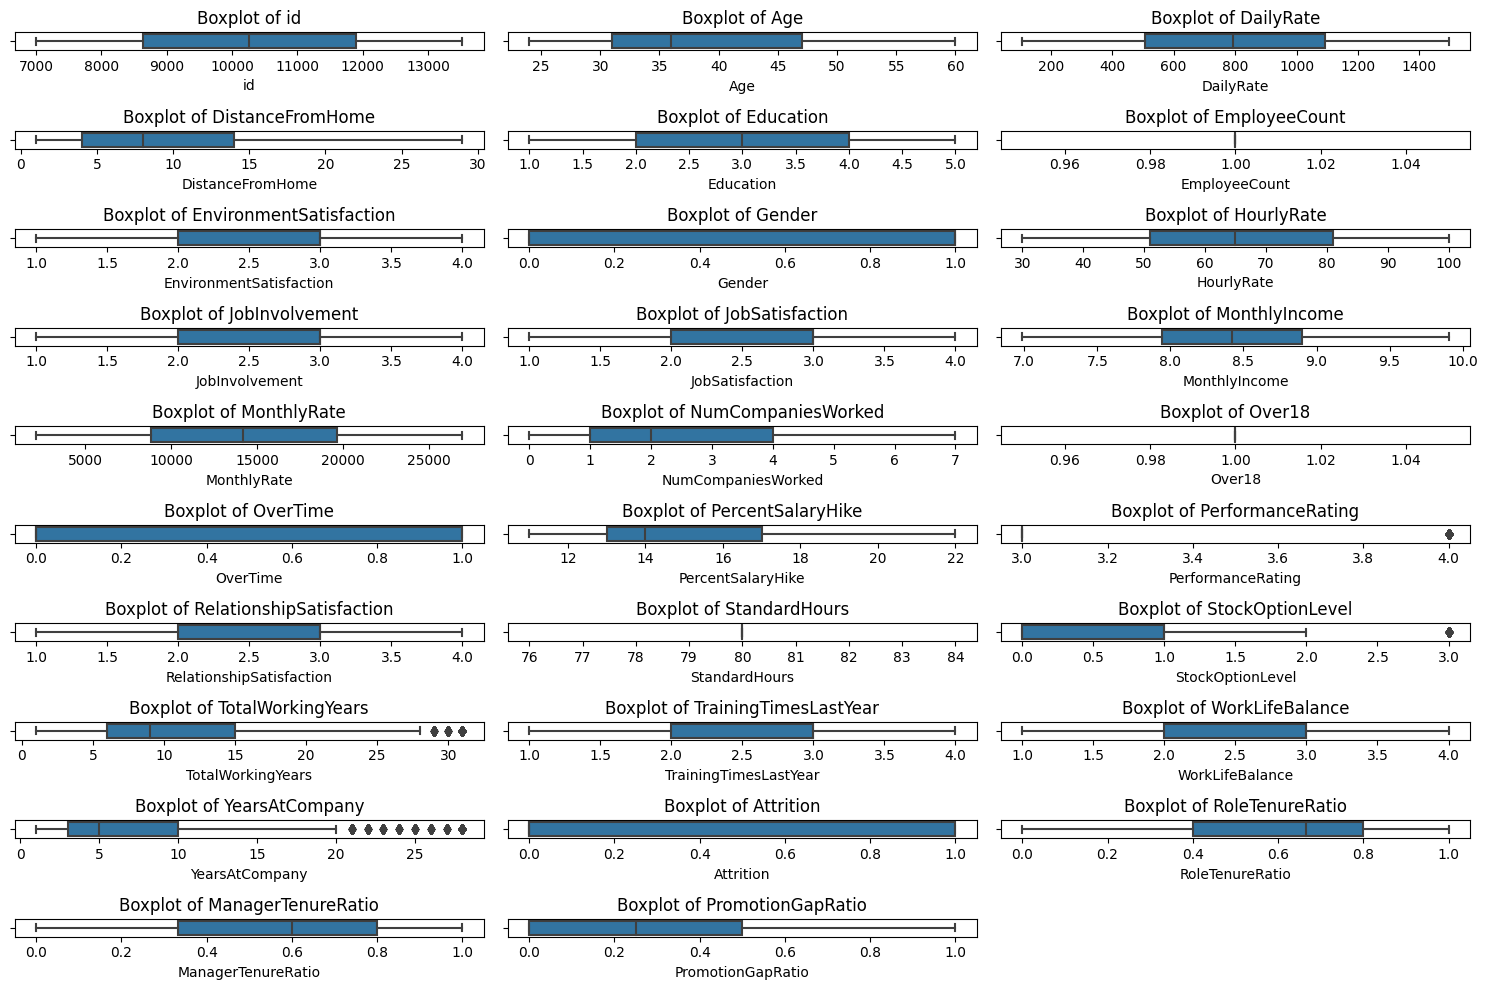

In [66]:

# Exclude non-numeric columns (if necessary)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the grid dimensions (e.g., 3 rows, 3 columns)
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the subplots with shared y-axis
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharey=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the numeric columns and create a boxplot for each
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [67]:
# Drop StandardHours, Over18, EmployeeCount because it's constant/nearly constant
data.drop(columns=['StandardHours', 'Over18', 'EmployeeCount'], inplace=True)

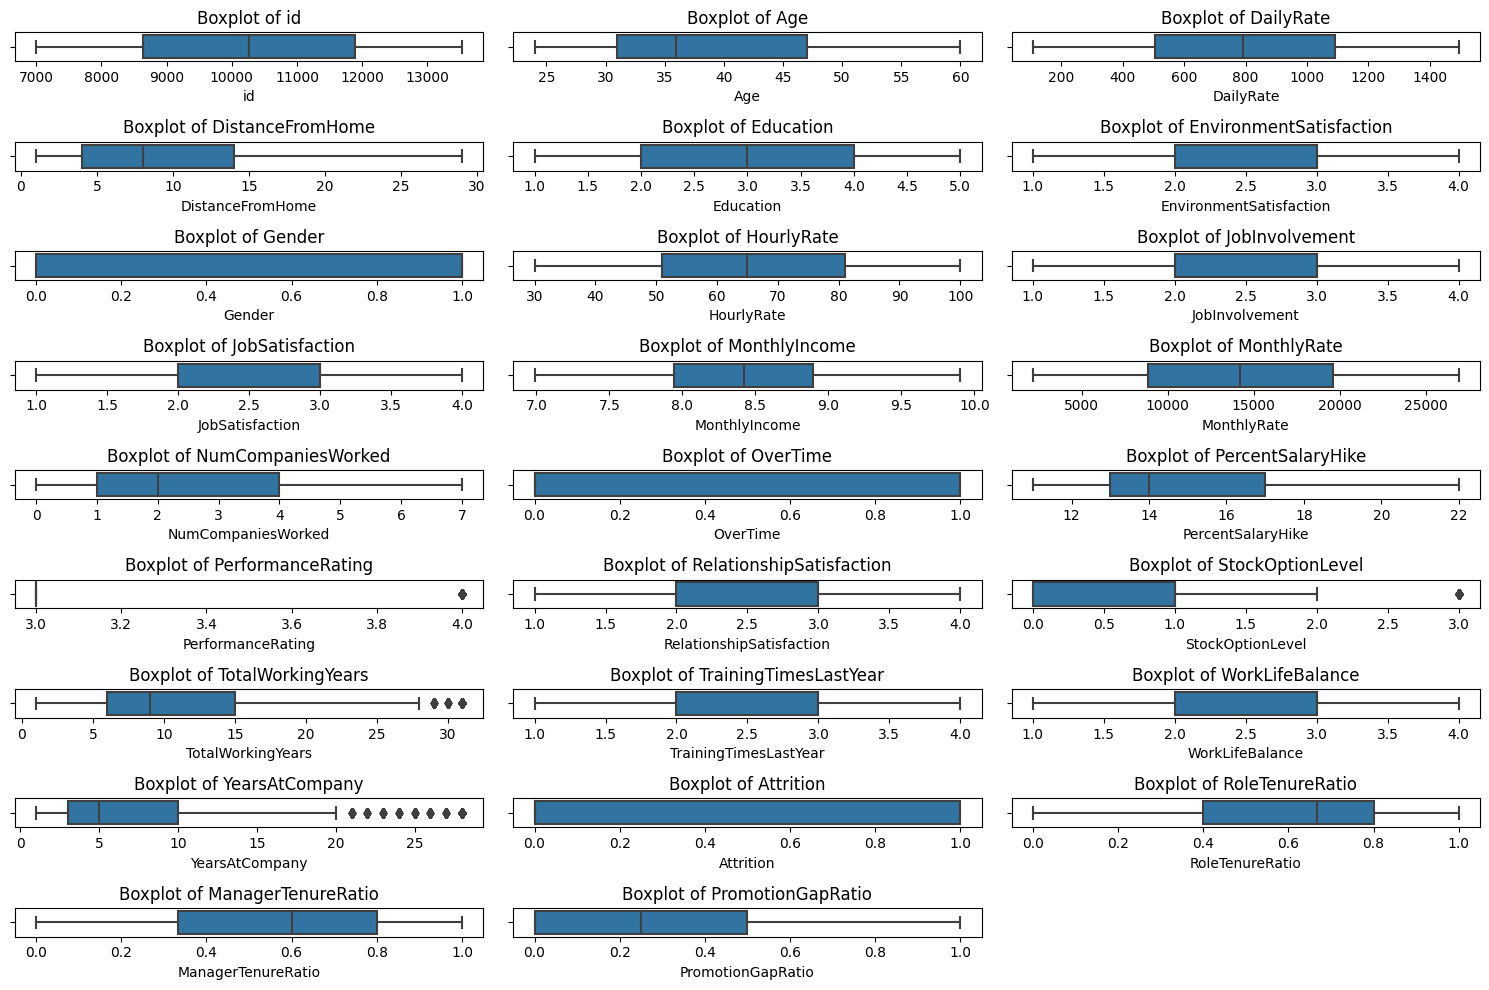

In [68]:

# Exclude non-numeric columns (if necessary)
numeric_cols = data.select_dtypes(include=['float64', 'int64']).columns

# Set up the grid dimensions (e.g., 3 rows, 3 columns)
n_cols = 3  # Number of columns in the grid
n_rows = (len(numeric_cols) + n_cols - 1) // n_cols  # Calculate the number of rows needed

# Set up the subplots with shared y-axis
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 10), sharey=True)
axes = axes.flatten()  # Flatten the axes array for easy iteration

# Iterate through the numeric columns and create a boxplot for each
for i, col in enumerate(numeric_cols):
    sns.boxplot(data=data, x=col, ax=axes[i])
    axes[i].set_title(f'Boxplot of {col}')

# Remove any empty subplots
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# Adjust layout
plt.tight_layout()
plt.show()


In [69]:
from sklearn.impute import KNNImputer

all_columns = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement', 'JobSatisfaction',
    'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance',
    'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating',
    'RoleTenureRatio', 'ManagerTenureRatio', 'PromotionGapRatio'
]

knn_imputer = KNNImputer(n_neighbors=5)
data[all_columns] = knn_imputer.fit_transform(data[all_columns])


In [70]:
data.isnull().sum()

id                                   0
Age                                  0
DailyRate                            0
DistanceFromHome                     0
Education                            0
EnvironmentSatisfaction              0
Gender                               0
HourlyRate                           0
JobInvolvement                       0
JobSatisfaction                      0
MonthlyIncome                        0
MonthlyRate                          0
NumCompaniesWorked                   0
OverTime                             0
PercentSalaryHike                    0
PerformanceRating                    0
RelationshipSatisfaction             0
StockOptionLevel                     0
TotalWorkingYears                    0
TrainingTimesLastYear                0
WorkLifeBalance                      0
YearsAtCompany                       0
Attrition                            0
RoleTenureRatio                      0
ManagerTenureRatio                   0
PromotionGapRatio        

# Data Modelling

In [71]:
from sklearn.model_selection import train_test_split

X = data.drop('Attrition', axis=1)
y = data['Attrition'] 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

print("Training data shape (X_train):", X_train.shape)
print("Testing data shape (X_test):", X_test.shape)
print("Training target shape (y_train):", y_train.shape)
print("Testing target shape (y_test):", y_test.shape)


Training data shape (X_train): (5224, 44)
Testing data shape (X_test): (1306, 44)
Training target shape (y_train): (5224,)
Testing target shape (y_test): (1306,)


## LightGBM Hyperparameter Tuning using Optuna
In this notebook, we will be using **Optuna** to perform hyperparameter optimization for a **LightGBM** classifier. LightGBM is a powerful gradient boosting algorithm widely used for classification tasks, and hyperparameter tuning can significantly improve its performance.

We will:
1. **Scale the features** using `StandardScaler`.
2. **Handle class imbalance** using `SMOTE` (Synthetic Minority Over-sampling Technique).
3. **Optimize the LightGBM hyperparameters** using Optuna.
4. **Evaluate model performance** using the weighted F1 score and a confusion matrix.


[I 2024-10-25 16:48:54,663] A new study created in memory with name: no-name-fc1d14e5-2f19-4068-bd8d-50f2089fa76c
[I 2024-10-25 16:49:04,259] Trial 0 finished with value: 0.875263799928251 and parameters: {'n_estimators': 411, 'learning_rate': 0.09819081341253458, 'max_depth': 3, 'min_samples_split': 9, 'min_samples_leaf': 9, 'subsample': 0.827916490172808, 'max_features': 0.8326013228512753}. Best is trial 0 with value: 0.875263799928251.
[I 2024-10-25 16:49:09,057] Trial 1 finished with value: 0.892802450229709 and parameters: {'n_estimators': 112, 'learning_rate': 0.011956981873844285, 'max_depth': 6, 'min_samples_split': 10, 'min_samples_leaf': 6, 'subsample': 0.8040223179043802, 'max_features': 0.889872710164225}. Best is trial 1 with value: 0.892802450229709.
[I 2024-10-25 16:49:22,151] Trial 2 finished with value: 0.894952459546289 and parameters: {'n_estimators': 243, 'learning_rate': 0.010485842280865507, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 8, 'subsamp

Best Hyperparameters: {'n_estimators': 243, 'learning_rate': 0.010485842280865507, 'max_depth': 10, 'min_samples_split': 5, 'min_samples_leaf': 8, 'subsample': 0.7022814970137903, 'max_features': 0.7543234405984782}
Best F1 Score: 0.894952459546289
Final F1 Score: 0.8950


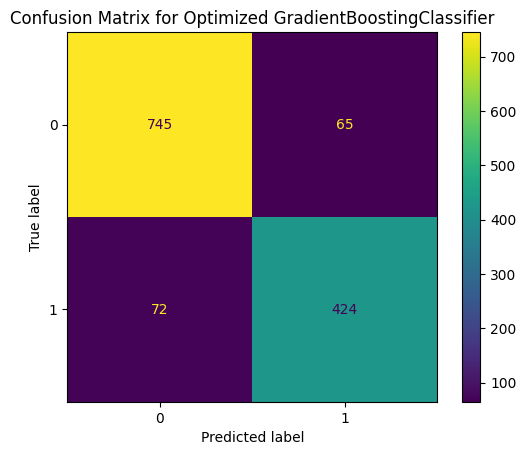

In [74]:
import optuna
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.metrics import f1_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from imblearn.over_sampling import SMOTE
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import pandas as pd

# Preprocessing (assuming X_train, X_test, y_train, y_test are predefined)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Resample the training set to handle class imbalance
sm = SMOTE(random_state=42)
X_train_res, y_train_res = sm.fit_resample(X_train_scaled, y_train)

# Optuna objective function for GradientBoostingClassifier
def objective(trial):
    params = {
        'n_estimators': trial.suggest_int('n_estimators', 100, 500),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.2),
        'max_depth': trial.suggest_int('max_depth', 3, 10),
        'min_samples_split': trial.suggest_int('min_samples_split', 2, 10),
        'min_samples_leaf': trial.suggest_int('min_samples_leaf', 1, 10),
        'subsample': trial.suggest_uniform('subsample', 0.6, 1.0),
        'max_features': trial.suggest_uniform('max_features', 0.6, 1.0),
    }

    model = GradientBoostingClassifier(**params, random_state=42)
    model.fit(X_train_res, y_train_res)
    
    y_pred = model.predict(X_test_scaled)
    
    f1 = f1_score(y_test, y_pred, average='weighted')
    return f1

# Create the study object and optimize for 50 trials
study = optuna.create_study(direction='maximize')
study.optimize(objective, n_trials=50)

# Print the best parameters and the best F1 score from the Optuna optimization
print(f"Best Hyperparameters: {study.best_params}")
print(f"Best F1 Score: {study.best_value}")

# Train final model with the best parameters from the study
best_params = study.best_params
best_model = GradientBoostingClassifier(**best_params, random_state=42)
best_model.fit(X_train_res, y_train_res)

# Predict and evaluate the final model
y_pred = best_model.predict(X_test_scaled)

f1 = f1_score(y_test, y_pred, average='weighted')
print(f"Final F1 Score: {f1:.4f}")

# Display confusion matrix
conf_matrix = confusion_matrix(y_test, y_pred)
ConfusionMatrixDisplay(conf_matrix).plot()
plt.title("Confusion Matrix for Optimized GradientBoostingClassifier")
plt.show()


# Submission

In [ ]:
data_subm = pd.read_csv('/kaggle/input/data-royale-2024/Test.csv')

In [ ]:
data_subm.head()

In [ ]:
import pandas as pd
import numpy as np

# Create the combined ratio features
data_subm['Over18'] = data_subm['Over18'].apply(lambda x: 1)
data_subm['OverTime'] = data_subm['OverTime'].apply(lambda x: 1 if x == 'Yes' else 0)
data_subm['RoleTenureRatio'] = data_subm['YearsInCurrentRole'] / data_subm['YearsAtCompany']
data_subm['ManagerTenureRatio'] = data_subm['YearsWithCurrManager'] / data_subm['YearsAtCompany']
data_subm['PromotionGapRatio'] = data_subm['YearsSinceLastPromotion'] / data_subm['YearsAtCompany']

# Drop the original columns that were used to create the new features
data_subm = data_subm.drop(columns=['YearsInCurrentRole', 'YearsWithCurrManager', 'YearsSinceLastPromotion', 'JobLevel'])

# Function to cap outliers with more aggressive percentiles (5th and 95th percentiles)
def cap_outliers(data_subm, column, lower_percentile=0.05, upper_percentile=0.95):
    lower_cap = data_subm[column].quantile(lower_percentile)
    upper_cap = data_subm[column].quantile(upper_percentile)
    data_subm[column] = data_subm[column].clip(lower=lower_cap, upper=upper_cap)
    return data_subm

def log_transform(data_subm, column):
    data_subm[column] = np.log1p(data_subm[column])  # log1p is used to avoid log(0) issues
    return data_subm

# Adjusting the capping threshold to 5th and 95th percentiles
data_subm = cap_outliers(data_subm, 'Age', lower_percentile=0.05, upper_percentile=0.95)
data_subm = cap_outliers(data_subm, 'TotalWorkingYears', lower_percentile=0.05, upper_percentile=0.95)
data_subm = cap_outliers(data_subm, 'YearsAtCompany', lower_percentile=0.05, upper_percentile=0.95)
data_subm = cap_outliers(data_subm, 'PercentSalaryHike', lower_percentile=0.05, upper_percentile=0.95)
data_subm = cap_outliers(data_subm, 'NumCompaniesWorked', lower_percentile=0.05, upper_percentile=0.95)
data_subm = cap_outliers(data_subm, 'TrainingTimesLastYear', lower_percentile=0.05, upper_percentile=0.95)
data_subm = cap_outliers(data_subm, 'RoleTenureRatio', lower_percentile=0.05, upper_percentile=0.95)
data_subm = cap_outliers(data_subm, 'ManagerTenureRatio', lower_percentile=0.05, upper_percentile=0.95)
data_subm = cap_outliers(data_subm, 'PromotionGapRatio', lower_percentile=0.05, upper_percentile=0.95)

# Log transform for 'MonthlyIncome'
data_subm = log_transform(data_subm, 'MonthlyIncome')

# Handling outliers manually by specifying thresholds
data_subm['Age'] = data_subm['Age'].clip(lower=20, upper=60)
data_subm['TotalWorkingYears'] = data_subm['TotalWorkingYears'].clip(upper=35)
data_subm['YearsAtCompany'] = data_subm['YearsAtCompany'].clip(upper=30)
data_subm['TrainingTimesLastYear'] = data_subm['TrainingTimesLastYear'].clip(upper=4)

# Drop StandardHours, Over18, EmployeeCount
data_subm.drop(columns=['StandardHours', 'Over18', 'EmployeeCount'], inplace=True)

# List of object columns that need to be encoded
object_columns = ['BusinessTravel', 'Department', 'EducationField', 'Gender', 'JobRole', 'MaritalStatus']

# 1. One-Hot Encoding for nominal categorical variables
one_hot_columns = ['BusinessTravel', 'Department', 'EducationField', 'JobRole', 'MaritalStatus']

# One-Hot Encoding the nominal columns
data_subm = pd.get_dummies(data_subm, columns=one_hot_columns, drop_first=True)

# 2. Label Encoding for 'Gender' (binary)
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()
data_subm['Gender'] = label_encoder.fit_transform(data_subm['Gender'])

from sklearn.impute import KNNImputer, SimpleImputer
from sklearn.experimental import enable_iterative_imputer  # Enables the IterativeImputer
from sklearn.impute import IterativeImputer

# Categorical columns
categorical_columns = [
    'Education', 'EnvironmentSatisfaction', 'JobInvolvement',
    'JobSatisfaction', 'StockOptionLevel', 'RelationshipSatisfaction', 'WorkLifeBalance'
]

# Numerical columns
numerical_columns = [
    'DailyRate', 'DistanceFromHome', 'HourlyRate', 'MonthlyIncome', 'MonthlyRate',
    'NumCompaniesWorked', 'PercentSalaryHike', 'PerformanceRating'
]

# Additional calculated columns (if relevant)
calculated_columns = ['RoleTenureRatio', 'ManagerTenureRatio', 'PromotionGapRatio']

# Combine all columns
all_columns = categorical_columns + numerical_columns + calculated_columns

# Define imputation method (You can change this to 'knn', 'iterative', 'simple')
imputation_method = 'knn'  # Change this to 'iterative' or 'simple' as needed

# Apply the selected imputation method
if imputation_method == 'knn':
    # KNN Imputation
    knn_imputer = KNNImputer(n_neighbors=5)
    data_subm[all_columns] = knn_imputer.fit_transform(data_subm[all_columns])
    
elif imputation_method == 'iterative':
    # Iterative Imputation
    iter_imputer = IterativeImputer(random_state=42)
    data_subm[all_columns] = iter_imputer.fit_transform(data_subm[all_columns])
    
elif imputation_method == 'simple':
    # Simple Imputer with mean for numerical columns and most frequent for categorical columns
    mean_imputer = SimpleImputer(strategy='mean')
    most_frequent_imputer = SimpleImputer(strategy='most_frequent')
    
    # Apply to numerical and calculated columns
    data_subm[numerical_columns + calculated_columns] = mean_imputer.fit_transform(data_subm[numerical_columns + calculated_columns])
    
    # Apply to categorical columns
    data_subm[categorical_columns] = most_frequent_imputer.fit_transform(data_subm[categorical_columns])

# After imputing missing values, you can proceed with your modeling steps



In [ ]:
import pandas as pd

# Assuming 'data_subm' is already preprocessed (as per previous steps)
# Step 1: Apply the same scaling transformation to the data_subm
data_subm_scaled = scaler.transform(data_subm)  # Apply the trained scaler to scale the submission data

# Step 2: Make predictions on the data_subm using the best_model from Optuna
subm_predictions_binary = best_model.predict(data_subm_scaled)

# Step 3: Convert the binary predictions (0/1) back to 'True'/'False' for 'Attrition'
subm_predictions = pd.Series(subm_predictions_binary).replace({1: 'True', 0: 'False'})

# Step 4: Prepare the submission DataFrame
submission = pd.DataFrame({
    'id': data_subm['id'],  # Replace 'id' with the actual identifier column in data_subm
    'Attrition': subm_predictions
})

# Step 5: Export the submission DataFrame to a CSV file
# Save the submission file in the current directory
submission.to_csv('submission.csv', index=False)  # No need to specify a directory
  # Save to the required path

print("Predictions saved to 'submission.csv'")
